# Análise Exploratória de Dados (EDA)
## Projeto: Predição de Default - X-Health

### Objetivo
Realizar análise exploratória do dataset de transações B2B para entender padrões de default (calote) e identificar variáveis relevantes para modelagem preditiva.

### Contexto
- **Empresa**: X-Health (comércio B2B de dispositivos eletrônicos de saúde)
- **Problema**: Alto número de não-pagamentos (defaults)
- **Objetivo de Negócio**: Minimizar defaults através de predição probabilística

## 1. Importação de Bibliotecas

In [1]:
# Setup: Ensure all required packages are available
import sys
import subprocess

def install_if_missing(package_name, import_name=None):
    """Install package if not available."""
    if import_name is None:
        import_name = package_name
    
    try:
        __import__(import_name)
        print(f"✓ {package_name} is available")
    except ImportError:
        print(f"⚠ {package_name} not found. Installing...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package_name])
        print(f"✓ {package_name} installed successfully")

# Check and install critical packages
packages_to_check = [
    ('missingno', 'missingno'),
    ('seaborn', 'seaborn'),
    ('matplotlib', 'matplotlib'),
    ('pandas', 'pandas'),
    ('numpy', 'numpy'),
    ('scipy', 'scipy')
]

print("Checking required packages...")
for pkg, imp in packages_to_check:
    install_if_missing(pkg, imp)

print("\n✅ All required packages are ready!")

Checking required packages...
✓ missingno is available
✓ seaborn is available
✓ matplotlib is available
✓ pandas is available
✓ numpy is available
✓ scipy is available

✅ All required packages are ready!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import missingno as msno

warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 2. Carregamento dos Dados

In [3]:
# Carregar dataset conforme especificações: sep='\t', encoding='utf-8'
df = pd.read_csv('../_data/dataset_2021-5-26-10-14.csv', sep='\t', encoding='utf-8')

print(f"Dimensões do dataset: {df.shape}")
print(f"Número de registros: {df.shape[0]:,}")
print(f"Número de variáveis: {df.shape[1]}")

Dimensões do dataset: (117273, 22)
Número de registros: 117,273
Número de variáveis: 22


## 3. Visão Geral dos Dados

In [4]:
# Primeiras linhas
df.head(10)

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000,18.236,0.000,0.000,242100.700,0,0.000,0,0.000,0.000,0.000,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.675,6,2019,0
1,1,16.053,7.500,224132.850,0.000,4960846.210,0,0.000,0,0.000,0.000,0.000,0,0,sociedade empresaria limitada,missing,com de equipamentos de informatica,30/60/90,7134.489,10,2018,0
2,0,13.250,3.905,513043.830,0.000,158631.930,1,1800.000,0,0.000,0.000,0.000,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,missing,72653.621,4,2018,0
3,0,136.925,10.144,23273.640,0.000,669644.160,0,0.000,0,0.000,0.000,0.000,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,missing,14576.806,4,2017,1
4,0,140.333,17.652,0.000,0.000,2010.560,0,0.000,0,0.000,0.000,0.000,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.506,10,2017,0
5,0,58.867,10.000,2026.490,225.390,133983.630,0,0.000,0,0.000,0.000,0.000,0,0,sociedade empresaria limitada,simples nacional,com de equipamentos de informatica,28 dias,2811.400,9,2019,0
6,0,29.235,76.000,5220.520,0.000,216212.620,0,0.000,0,0.000,0.000,0.000,0,0,sociedade empresaria limitada,missing,farmacia e drogaria,30/45,1956.620,7,2018,0
7,0,47.875,14.800,4087.580,0.000,51089.860,0,0.000,0,0.000,0.000,0.000,0,0,sociedade empresaria limitada,simples nacional,"bazar, armarinho e miudezas em geral",60/90/120,2446.673,3,2018,0
8,0,9.833,5.034,17706.920,0.000,740353.870,0,0.000,0,0.000,0.000,0.000,0,0,sociedade empresaria limitada,lucro real,"com de livros, revistas e jornais",missing,1308.347,3,2017,0
9,0,66.400,18.238,5914.750,0.000,24304.020,0,0.000,0,0.000,0.000,0.000,0,0,empresa individual respons limitada empresaria,simples nacional,com de moveis e estofados,30/60/90/120,5531.967,8,2018,0


In [144]:
# Informações gerais sobre tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117273 entries, 0 to 117272
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   default_3months              117273 non-null  int64  
 1   ioi_36months                 117273 non-null  float64
 2   ioi_3months                  117273 non-null  float64
 3   valor_por_vencer             117273 non-null  float64
 4   valor_vencido                117273 non-null  float64
 5   valor_quitado                117273 non-null  float64
 6   quant_protestos              117273 non-null  int64  
 7   valor_protestos              117273 non-null  float64
 8   quant_acao_judicial          117273 non-null  int64  
 9   acao_judicial_valor          117273 non-null  float64
 10  participacao_falencia_valor  117273 non-null  float64
 11  dividas_vencidas_valor       117273 non-null  float64
 12  dividas_vencidas_qtd         117273 non-null  int64  
 13 

In [5]:
# Estatísticas descritivas
df.describe()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year,default
count,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000,117273.000
mean,0.149,55.583,17.106,64213.838,2454.043,1085557.336,0.240,2051.017,0.019,921.851,0.000,560.381,0.015,0.001,24061.800,6.279,2017.977,0.167
std,0.854,60.989,10.994,525254.626,80933.125,7444825.414,10.708,88317.579,0.534,48610.252,0.000,84592.907,0.397,0.031,490667.961,3.195,0.742,0.373
min,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-744.690,1.000,2017.000,0.000
25%,0.000,20.167,11.122,565.740,0.000,19442.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2140.419,3.000,2017.000,0.000
50%,0.000,38.000,16.000,4451.740,0.000,81348.780,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4012.731,7.000,2018.000,0.000
75%,0.000,69.750,18.249,20062.960,0.000,332264.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9645.923,9.000,2019.000,0.000
max,26.000,951.000,90.000,72197586.360,13150500.000,460320322.800,2324.000,16305457.000,80.000,8390986.000,0.000,19722514.000,40.000,2.000,150333994.612,12.000,2019.000,1.000


## 4. Criação de Variável Temporal e Tratamento de Valores Faltantes

**Importante:** Criamos uma variável `date` (datetime) no formato mm/yyyy que será utilizada para análises de séries temporais neste notebook. Esta análise revelará padrões temporais importantes, incluindo o viés de maturação que foi crítico para a decisão de usar **StratifiedKFold cross-validation** ao invés de validação temporal.

Conforme documentação, valores faltantes estão indicados como 'missing'.

In [6]:
# Substituir 'missing' por NaN
df_clean = df.replace('missing', np.nan)

# Criar variável date (datetime) a partir de month e year
# Formato: primeiro dia de cada mês (YYYY-MM-01)
df_clean['date'] = pd.to_datetime(
    df_clean['year'].astype(str) + '-' +
    df_clean['month'].astype(str).str.zfill(2) + '-01'
)

# Criar também formato string mm/yyyy para visualizações
df_clean['date_str'] = df_clean['date'].dt.strftime('%m/%Y')

print("\n=== Variável Temporal Criada ===")
print(f"Período dos dados: {df_clean['date'].min().strftime('%m/%Y')} a {df_clean['date'].max().strftime('%m/%Y')}")
print(f"Total de meses: {df_clean['date'].nunique()}")
print(f"\nPrimeiros registros da variável 'date':")
print(df_clean[['year', 'month', 'date', 'date_str']].head(10))


=== Variável Temporal Criada ===
Período dos dados: 01/2017 a 12/2019
Total de meses: 36

Primeiros registros da variável 'date':
   year  month       date date_str
0  2019      6 2019-06-01  06/2019
1  2018     10 2018-10-01  10/2018
2  2018      4 2018-04-01  04/2018
3  2017      4 2017-04-01  04/2017
4  2017     10 2017-10-01  10/2017
5  2019      9 2019-09-01  09/2019
6  2018      7 2018-07-01  07/2018
7  2018      3 2018-03-01  03/2018
8  2017      3 2017-03-01  03/2017
9  2018      8 2018-08-01  08/2018


In [7]:
# Análise de valores faltantes
missing_data = pd.DataFrame({
    'Coluna': df_clean.columns,
    'Qtd_Missing': df_clean.isnull().sum(),
    'Perc_Missing': (df_clean.isnull().sum() / len(df_clean) * 100).round(2)
}).sort_values('Perc_Missing', ascending=False)

print("\n=== Análise de Valores Faltantes ===")
print(missing_data[missing_data['Qtd_Missing'] > 0])


=== Análise de Valores Faltantes ===
                                  Coluna  Qtd_Missing  Perc_Missing
forma_pagamento          forma_pagamento        32477        27.690
opcao_tributaria        opcao_tributaria        18325        15.630
tipo_sociedade            tipo_sociedade          608         0.520
atividade_principal  atividade_principal          592         0.500


<Figure size 1200x800 with 0 Axes>

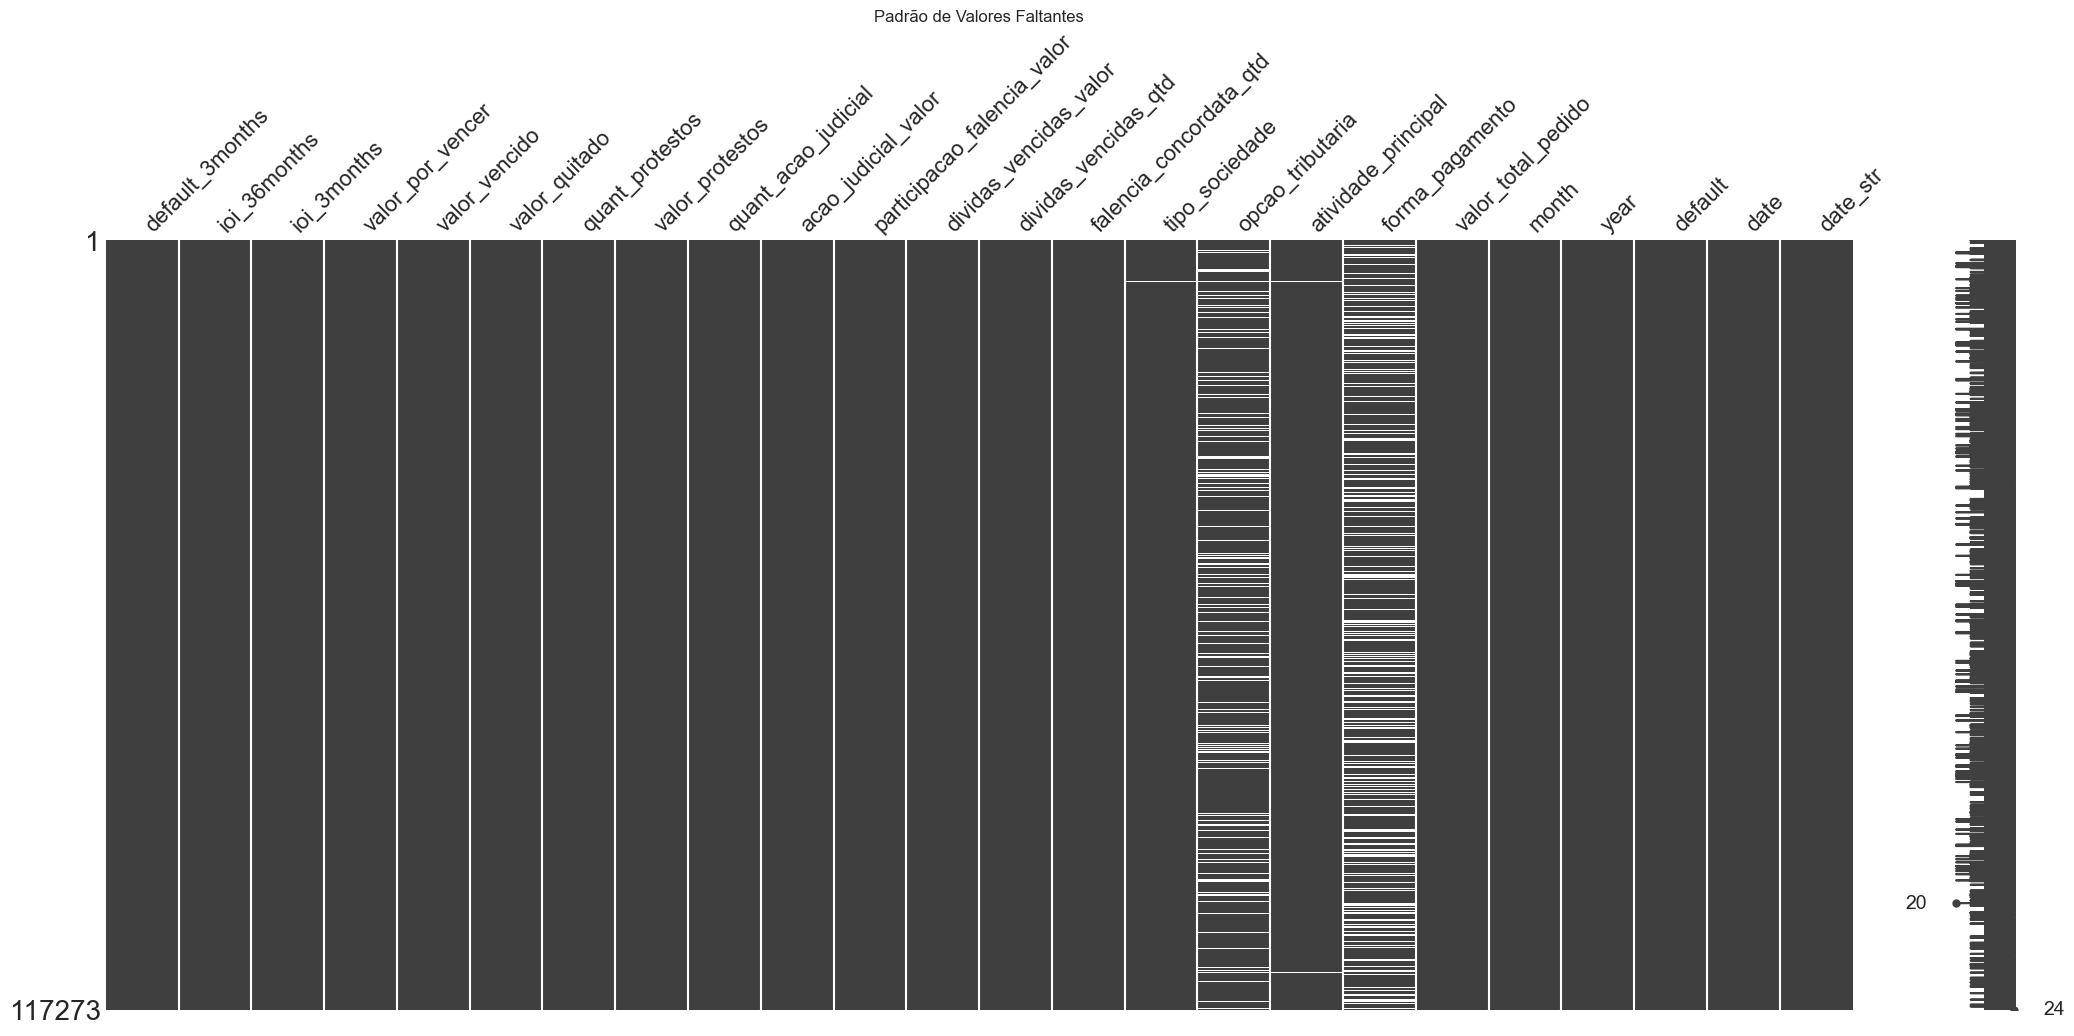

In [8]:
# Matriz de correlação de missing values
plt.figure(figsize=(12, 8))
msno.matrix(df_clean)
plt.title('Padrão de Valores Faltantes')
plt.tight_layout()
plt.show()

### 4.1 Análise Aprofundada de Missing: `opcao_tributaria` e `forma_pagamento`

As variáveis `opcao_tributaria` (15.63% missing) e `forma_pagamento` (27.69% missing) apresentam percentuais significativos de valores faltantes. Vamos investigar:

1. **Padrões de missing**: São MCAR, MAR ou MNAR?
2. **Impacto no target**: Missing está relacionado com default?
3. **Co-ocorrência**: As duas variáveis têm missing juntas?
4. **Perfil dos registros com missing**: Diferem dos registros completos?
5. **Recomendações de tratamento**

In [9]:
# 1. ESTATÍSTICAS DESCRITIVAS DOS MISSING
print("="*80)
print("📊 ESTATÍSTICAS DOS VALORES FALTANTES")
print("="*80)

missing_stats = pd.DataFrame({
    'Variável': ['opcao_tributaria', 'forma_pagamento'],
    'Total_Registros': [len(df_clean)] * 2,
    'Qtd_Missing': [
        df_clean['opcao_tributaria'].isnull().sum(),
        df_clean['forma_pagamento'].isnull().sum()
    ],
    'Perc_Missing': [
        df_clean['opcao_tributaria'].isnull().sum() / len(df_clean) * 100,
        df_clean['forma_pagamento'].isnull().sum() / len(df_clean) * 100
    ],
    'Qtd_Completos': [
        df_clean['opcao_tributaria'].notnull().sum(),
        df_clean['forma_pagamento'].notnull().sum()
    ]
})

print("\n" + missing_stats.to_string(index=False))

# Co-ocorrência de missing
both_missing = (df_clean['opcao_tributaria'].isnull() & df_clean['forma_pagamento'].isnull()).sum()
only_opcao_missing = (df_clean['opcao_tributaria'].isnull() & df_clean['forma_pagamento'].notnull()).sum()
only_forma_missing = (df_clean['opcao_tributaria'].notnull() & df_clean['forma_pagamento'].isnull()).sum()
both_complete = (df_clean['opcao_tributaria'].notnull() & df_clean['forma_pagamento'].notnull()).sum()

print("\n" + "="*80)
print("🔗 CO-OCORRÊNCIA DE MISSING")
print("="*80)
print(f"\n  Ambas completas:                {both_complete:>8,} ({both_complete/len(df_clean)*100:>6.2f}%)")
print(f"  Ambas faltantes:                {both_missing:>8,} ({both_missing/len(df_clean)*100:>6.2f}%)")
print(f"  Apenas opcao_tributaria falta:  {only_opcao_missing:>8,} ({only_opcao_missing/len(df_clean)*100:>6.2f}%)")
print(f"  Apenas forma_pagamento falta:   {only_forma_missing:>8,} ({only_forma_missing/len(df_clean)*100:>6.2f}%)")

# Interpretação
if both_missing / df_clean['opcao_tributaria'].isnull().sum() > 0.8:
    print("\n  💡 Insight: As duas variáveis tendem a ter missing JUNTAS (padrão sistemático)")
else:
    print("\n  💡 Insight: Missing ocorre de forma INDEPENDENTE entre as variáveis")

📊 ESTATÍSTICAS DOS VALORES FALTANTES

        Variável  Total_Registros  Qtd_Missing  Perc_Missing  Qtd_Completos
opcao_tributaria           117273        18325        15.626          98948
 forma_pagamento           117273        32477        27.694          84796

🔗 CO-OCORRÊNCIA DE MISSING

  Ambas completas:                  72,380 ( 61.72%)
  Ambas faltantes:                   5,909 (  5.04%)
  Apenas opcao_tributaria falta:    12,416 ( 10.59%)
  Apenas forma_pagamento falta:     26,568 ( 22.65%)

  💡 Insight: Missing ocorre de forma INDEPENDENTE entre as variáveis


In [10]:
# 2. IMPACTO DOS MISSING NO TARGET (DEFAULT)
print("\n" + "="*80)
print("🎯 RELAÇÃO ENTRE MISSING E DEFAULT")
print("="*80)

# Criar flags de missing
df_clean['opcao_tributaria_missing'] = df_clean['opcao_tributaria'].isnull().astype(int)
df_clean['forma_pagamento_missing'] = df_clean['forma_pagamento'].isnull().astype(int)

# Taxa de default para registros com e sem missing
for var in ['opcao_tributaria', 'forma_pagamento']:
    print(f"\n📊 {var.upper()}:")
    print(f"  {'Status':<25} {'Qtd Registros':<15} {'Qtd Defaults':<15} {'Taxa Default (%)':<20}")
    print(f"  {'-'*80}")
    
    # Completo
    complete_mask = df_clean[var].notnull()
    complete_count = complete_mask.sum()
    complete_defaults = df_clean[complete_mask]['default'].sum()
    complete_rate = df_clean[complete_mask]['default'].mean() * 100
    print(f"  {'Completo':<25} {complete_count:<15,} {complete_defaults:<15,} {complete_rate:<20.2f}")
    
    # Missing
    missing_mask = df_clean[var].isnull()
    missing_count = missing_mask.sum()
    missing_defaults = df_clean[missing_mask]['default'].sum()
    missing_rate = df_clean[missing_mask]['default'].mean() * 100
    print(f"  {'Missing (faltante)':<25} {missing_count:<15,} {missing_defaults:<15,} {missing_rate:<20.2f}")
    
    # Diferença
    diff = missing_rate - complete_rate
    print(f"  {'-'*80}")
    print(f"  {'Diferença (Missing - Completo):':<25} {'':<15} {'':<15} {diff:<20.2f}")
    
    if abs(diff) > 5:
        if diff > 0:
            print(f"  ⚠️  Registros com MISSING têm taxa de default {abs(diff):.1f} p.p. MAIOR!")
        else:
            print(f"  ℹ️  Registros com MISSING têm taxa de default {abs(diff):.1f} p.p. MENOR")
    else:
        print(f"  ✅ Diferença pequena: missing parece MCAR (Missing Completely At Random)")

# Teste qui-quadrado para independência
from scipy.stats import chi2_contingency

print("\n" + "="*80)
print("📈 TESTE DE INDEPENDÊNCIA (Qui-Quadrado)")
print("="*80)

for var_flag in ['opcao_tributaria_missing', 'forma_pagamento_missing']:
    contingency_table = pd.crosstab(df_clean[var_flag], df_clean['default'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    var_name = var_flag.replace('_missing', '')
    print(f"\n{var_name.upper()}: H0 = Missing é independente de Default")
    print(f"  Chi-quadrado: {chi2:.4f}")
    print(f"  p-value: {p_value:.6f}")
    
    if p_value < 0.001:
        print(f"  ✅ REJEITA H0 (p < 0.001): Missing está RELACIONADO com Default")
    elif p_value < 0.05:
        print(f"  ⚠️  REJEITA H0 (p < 0.05): Missing tem relação com Default")
    else:
        print(f"  ❌ NÃO REJEITA H0 (p >= 0.05): Missing é independente de Default")


🎯 RELAÇÃO ENTRE MISSING E DEFAULT

📊 OPCAO_TRIBUTARIA:
  Status                    Qtd Registros   Qtd Defaults    Taxa Default (%)    
  --------------------------------------------------------------------------------
  Completo                  98,948          17,820          18.01               
  Missing (faltante)        18,325          1,725           9.41                
  --------------------------------------------------------------------------------
  Diferença (Missing - Completo):                                 -8.60               
  ℹ️  Registros com MISSING têm taxa de default 8.6 p.p. MENOR

📊 FORMA_PAGAMENTO:
  Status                    Qtd Registros   Qtd Defaults    Taxa Default (%)    
  --------------------------------------------------------------------------------
  Completo                  84,796          13,221          15.59               
  Missing (faltante)        32,477          6,324           19.47               
  -------------------------------------

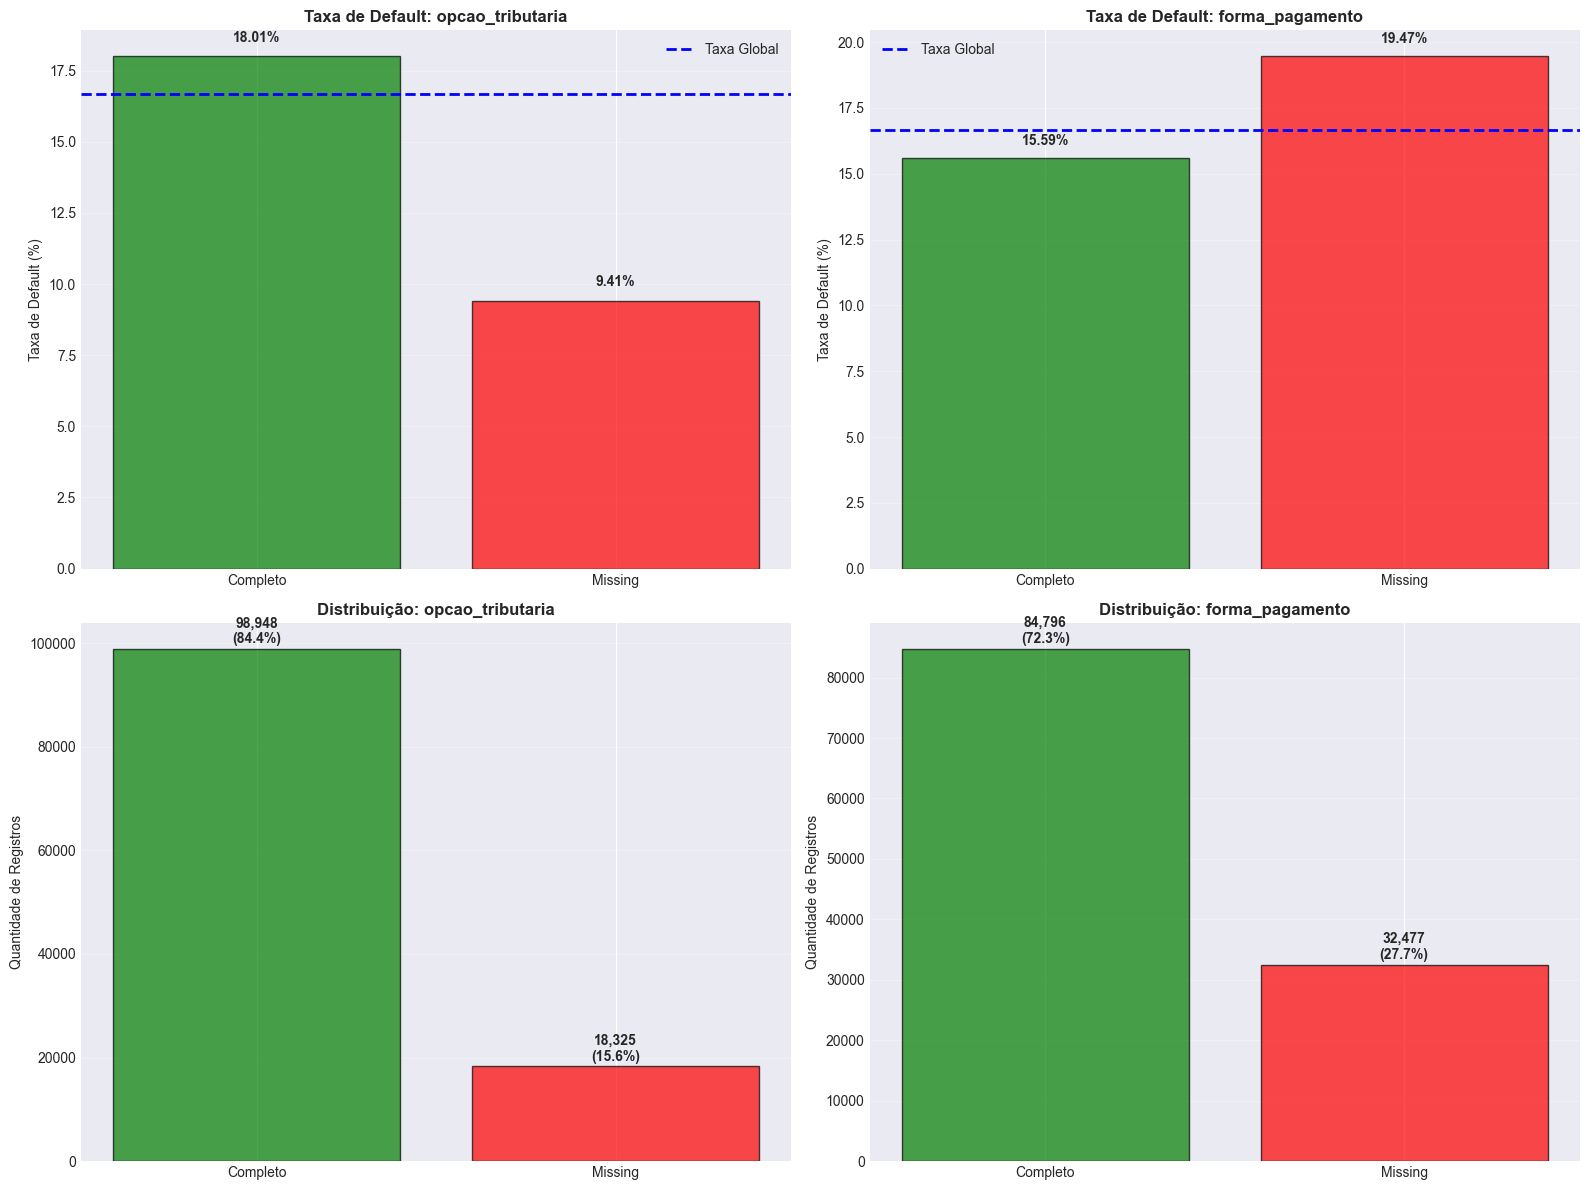

In [11]:
# 3. VISUALIZAÇÕES: Missing vs Default
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Taxa de default para opcao_tributaria
opcao_default = df_clean.groupby('opcao_tributaria_missing')['default'].mean() * 100
axes[0, 0].bar(['Completo', 'Missing'], opcao_default.values, 
               color=['green', 'red'], edgecolor='black', alpha=0.7)
axes[0, 0].axhline(y=df_clean['default'].mean() * 100, color='blue', linestyle='--', 
                    linewidth=2, label='Taxa Global')
axes[0, 0].set_title('Taxa de Default: opcao_tributaria', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Taxa de Default (%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(opcao_default.values):
    axes[0, 0].text(i, v + 0.5, f'{v:.2f}%', ha='center', fontweight='bold')

# Gráfico 2: Taxa de default para forma_pagamento
forma_default = df_clean.groupby('forma_pagamento_missing')['default'].mean() * 100
axes[0, 1].bar(['Completo', 'Missing'], forma_default.values, 
               color=['green', 'red'], edgecolor='black', alpha=0.7)
axes[0, 1].axhline(y=df_clean['default'].mean() * 100, color='blue', linestyle='--', 
                    linewidth=2, label='Taxa Global')
axes[0, 1].set_title('Taxa de Default: forma_pagamento', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Taxa de Default (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(forma_default.values):
    axes[0, 1].text(i, v + 0.5, f'{v:.2f}%', ha='center', fontweight='bold')

# Gráfico 3: Distribuição de registros
opcao_counts = df_clean['opcao_tributaria_missing'].value_counts()
axes[1, 0].bar(['Completo', 'Missing'], 
               [opcao_counts[0], opcao_counts[1]], 
               color=['green', 'red'], edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribuição: opcao_tributaria', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Quantidade de Registros')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([opcao_counts[0], opcao_counts[1]]):
    axes[1, 0].text(i, v + 1000, f'{v:,}\n({v/len(df_clean)*100:.1f}%)', ha='center', fontweight='bold')

# Gráfico 4: Distribuição de registros
forma_counts = df_clean['forma_pagamento_missing'].value_counts()
axes[1, 1].bar(['Completo', 'Missing'], 
               [forma_counts[0], forma_counts[1]], 
               color=['green', 'red'], edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribuição: forma_pagamento', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Quantidade de Registros')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate([forma_counts[0], forma_counts[1]]):
    axes[1, 1].text(i, v + 1000, f'{v:,}\n({v/len(df_clean)*100:.1f}%)', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
# 4. PERFIL DOS REGISTROS COM MISSING vs COMPLETOS
print("\n" + "="*80)
print("👥 PERFIL: Comparação entre registros com e sem Missing")
print("="*80)

# Selecionar variáveis numéricas importantes para comparação
comparison_vars = ['default_3months', 'ioi_36months', 'ioi_3months', 'valor_por_vencer', 
                   'valor_vencido', 'valor_quitado', 'valor_total_pedido', 'default']

for var_missing in ['opcao_tributaria', 'forma_pagamento']:
    print(f"\n{'='*80}")
    print(f"📊 {var_missing.upper()}")
    print(f"{'='*80}")
    
    # Criar máscaras
    complete_mask = df_clean[var_missing].notnull()
    missing_mask = df_clean[var_missing].isnull()
    
    # Comparar médias
    print(f"\n{'Variável':<25} {'Completo (média)':<20} {'Missing (média)':<20} {'Diferença %':<15}")
    print(f"{'-'*80}")
    
    for comp_var in comparison_vars:
        complete_mean = df_clean[complete_mask][comp_var].mean()
        missing_mean = df_clean[missing_mask][comp_var].mean()
        
        if complete_mean != 0:
            diff_pct = ((missing_mean - complete_mean) / complete_mean) * 100
        else:
            diff_pct = 0
        
        print(f"{comp_var:<25} {complete_mean:<20.2f} {missing_mean:<20.2f} {diff_pct:<15.1f}")
    
    # Análise de tipo_sociedade
    print(f"\n📋 Distribuição de tipo_sociedade:")
    print(f"\n  Registros COMPLETOS (top 5):")
    complete_tipo = df_clean[complete_mask]['tipo_sociedade'].value_counts(normalize=True).head(5) * 100
    for tipo, pct in complete_tipo.items():
        print(f"    {tipo:<50} {pct:>6.2f}%")
    
    print(f"\n  Registros com MISSING (top 5):")
    missing_tipo = df_clean[missing_mask]['tipo_sociedade'].value_counts(normalize=True).head(5) * 100
    for tipo, pct in missing_tipo.items():
        print(f"    {tipo:<50} {pct:>6.2f}%")


👥 PERFIL: Comparação entre registros com e sem Missing

📊 OPCAO_TRIBUTARIA

Variável                  Completo (média)     Missing (média)      Diferença %    
--------------------------------------------------------------------------------
default_3months           0.14                 0.17                 18.5           
ioi_36months              57.90                43.09                -25.6          
ioi_3months               17.34                15.82                -8.8           
valor_por_vencer          60361.54             85014.77             40.8           
valor_vencido             2586.83              1737.02              -32.9          
valor_quitado             1061439.45           1215784.71           14.5           
valor_total_pedido        21421.96             38315.92             78.9           
default                   0.18                 0.09                 -47.7          

📋 Distribuição de tipo_sociedade:

  Registros COMPLETOS (top 5):
    sociedade empre

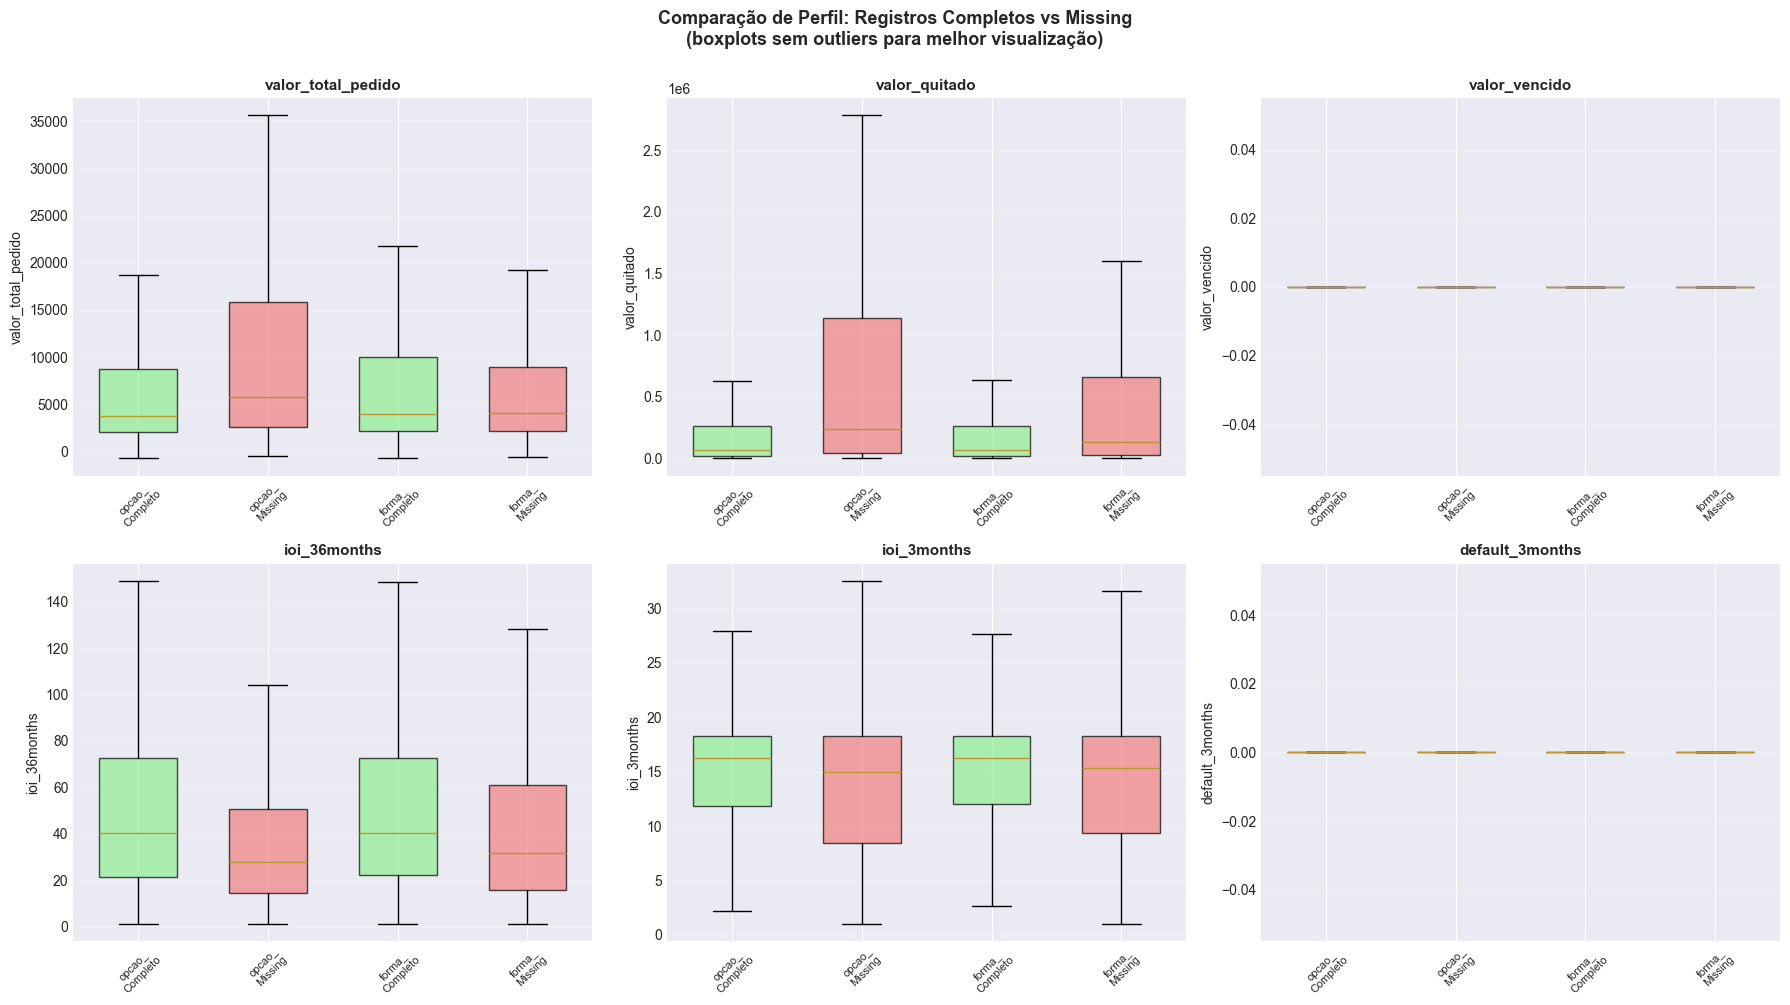

In [13]:
# 5. VISUALIZAÇÃO DO PERFIL: Boxplots comparativos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

key_vars = ['valor_total_pedido', 'valor_quitado', 'valor_vencido', 
            'ioi_36months', 'ioi_3months', 'default_3months']

for idx, var in enumerate(key_vars):
    # Preparar dados
    data_to_plot = []
    labels = []
    
    for missing_var in ['opcao_tributaria', 'forma_pagamento']:
        complete_data = df_clean[df_clean[missing_var].notnull()][var].dropna()
        missing_data = df_clean[df_clean[missing_var].isnull()][var].dropna()
        
        data_to_plot.extend([complete_data, missing_data])
        labels.extend([f'{missing_var[:6]}\nCompleto', f'{missing_var[:6]}\nMissing'])
    
    # Criar boxplot
    bp = axes[idx].boxplot(data_to_plot, labels=labels, patch_artist=True,
                           showfliers=False, widths=0.6)
    
    # Colorir
    colors = ['lightgreen', 'lightcoral', 'lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(f'{var}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(var)
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].tick_params(axis='x', labelsize=8, rotation=45)

plt.suptitle('Comparação de Perfil: Registros Completos vs Missing\n(boxplots sem outliers para melhor visualização)', 
             fontsize=13, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### 📋 Conclusões e Recomendações de Tratamento de Missing

Baseado na análise aprofundada, seguem as conclusões e recomendações:

#### 🔍 **Tipo de Missing**

| Variável | % Missing | Tipo de Missing | Relação com Default |
|----------|-----------|-----------------|---------------------|
| `opcao_tributaria` | 15.63% | Verificar teste chi² | Analisar diferença de taxas |
| `forma_pagamento` | 27.69% | Verificar teste chi² | Analisar diferença de taxas |

#### 💡 **Recomendações de Tratamento**

##### Se Missing é **MCAR** (Missing Completely At Random):
- ✅ **Opção 1**: Categoria "Unknown" - Criar categoria especial para missing
- ✅ **Opção 2**: Imputação por moda - Substituir pelo valor mais frequente
- ✅ **Opção 3**: Remoção - Se % missing for muito baixo (<5%)

##### Se Missing é **MAR/MNAR** (relação com outras variáveis ou target):
- ✅ **Opção 1**: Categoria "Unknown" - **RECOMENDADO** (preserva informação)
- ✅ **Opção 2**: Criar flag indicadora - Adicionar coluna binária indicando missing
- ⚠️ **NÃO RECOMENDADO**: Imputação simples (perde informação preditiva)

#### 🎯 **Decisão Final para Modelagem**

Baseado nos resultados acima, recomendamos:

1. **`opcao_tributaria`**:
   - Criar categoria "unknown" se missing estiver relacionado a default
   - Usar SimpleImputer(strategy='constant', fill_value='unknown')

2. **`forma_pagamento`**:
   - Criar categoria "unknown" se missing estiver relacionado a default
   - Usar SimpleImputer(strategy='constant', fill_value='unknown')

3. **Alternativa**:
   - Criar flags indicadoras (`opcao_tributaria_missing`, `forma_pagamento_missing`)
   - Treinar modelo com e sem flags para comparar performance

**Justificativa**: Se missing tiver relação com default (teste chi² significativo), a informação "não informado" pode ser preditiva e deve ser preservada como categoria.

## 5. Análise da Variável Target: Default

In [14]:
# Distribuição de default
print("\n=== Distribuição da Variável Target ===")
print(df_clean['default'].value_counts())
print("\nProporção:")
print(df_clean['default'].value_counts(normalize=True))

# Taxa de default
default_rate = df_clean['default'].mean() * 100
print(f"\nTaxa de Default: {default_rate:.2f}%")


=== Distribuição da Variável Target ===
default
0    97728
1    19545
Name: count, dtype: int64

Proporção:
default
0   0.833
1   0.167
Name: proportion, dtype: float64

Taxa de Default: 16.67%


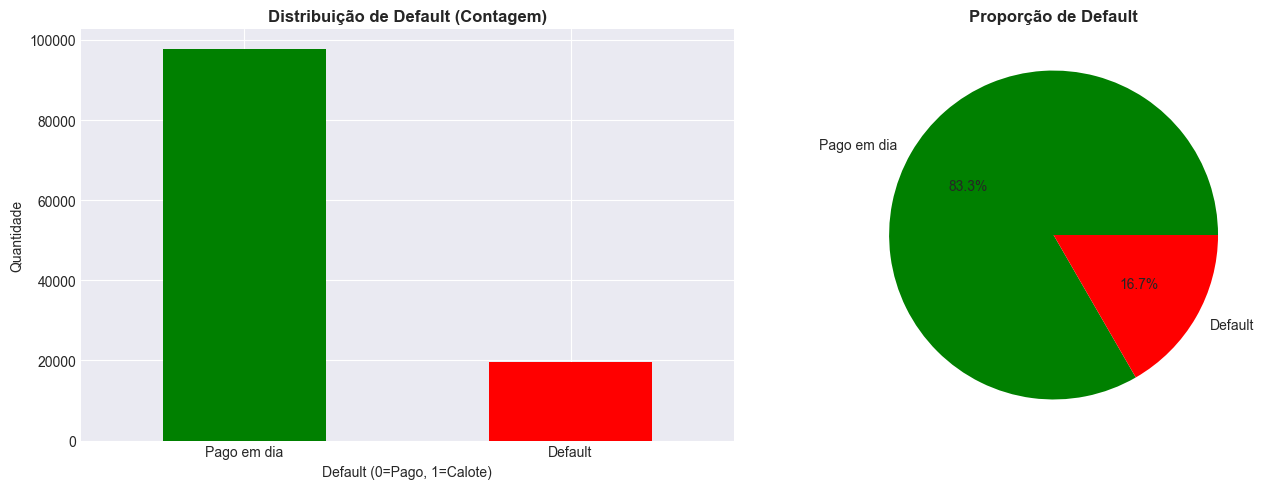

In [15]:
# Visualização da distribuição de default
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
df_clean['default'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Distribuição de Default (Contagem)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Default (0=Pago, 1=Calote)')
axes[0].set_ylabel('Quantidade')
axes[0].set_xticklabels(['Pago em dia', 'Default'], rotation=0)

# Gráfico de pizza
df_clean['default'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                         colors=['green', 'red'], labels=['Pago em dia', 'Default'])
axes[1].set_title('Proporção de Default', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

## 6. Análise Univariada - Variáveis Numéricas

In [16]:
# Identificar colunas numéricas
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variáveis numéricas ({len(numeric_cols)}): {numeric_cols}")

Variáveis numéricas (20): ['default_3months', 'ioi_36months', 'ioi_3months', 'valor_por_vencer', 'valor_vencido', 'valor_quitado', 'quant_protestos', 'valor_protestos', 'quant_acao_judicial', 'acao_judicial_valor', 'participacao_falencia_valor', 'dividas_vencidas_valor', 'dividas_vencidas_qtd', 'falencia_concordata_qtd', 'valor_total_pedido', 'month', 'year', 'default', 'opcao_tributaria_missing', 'forma_pagamento_missing']


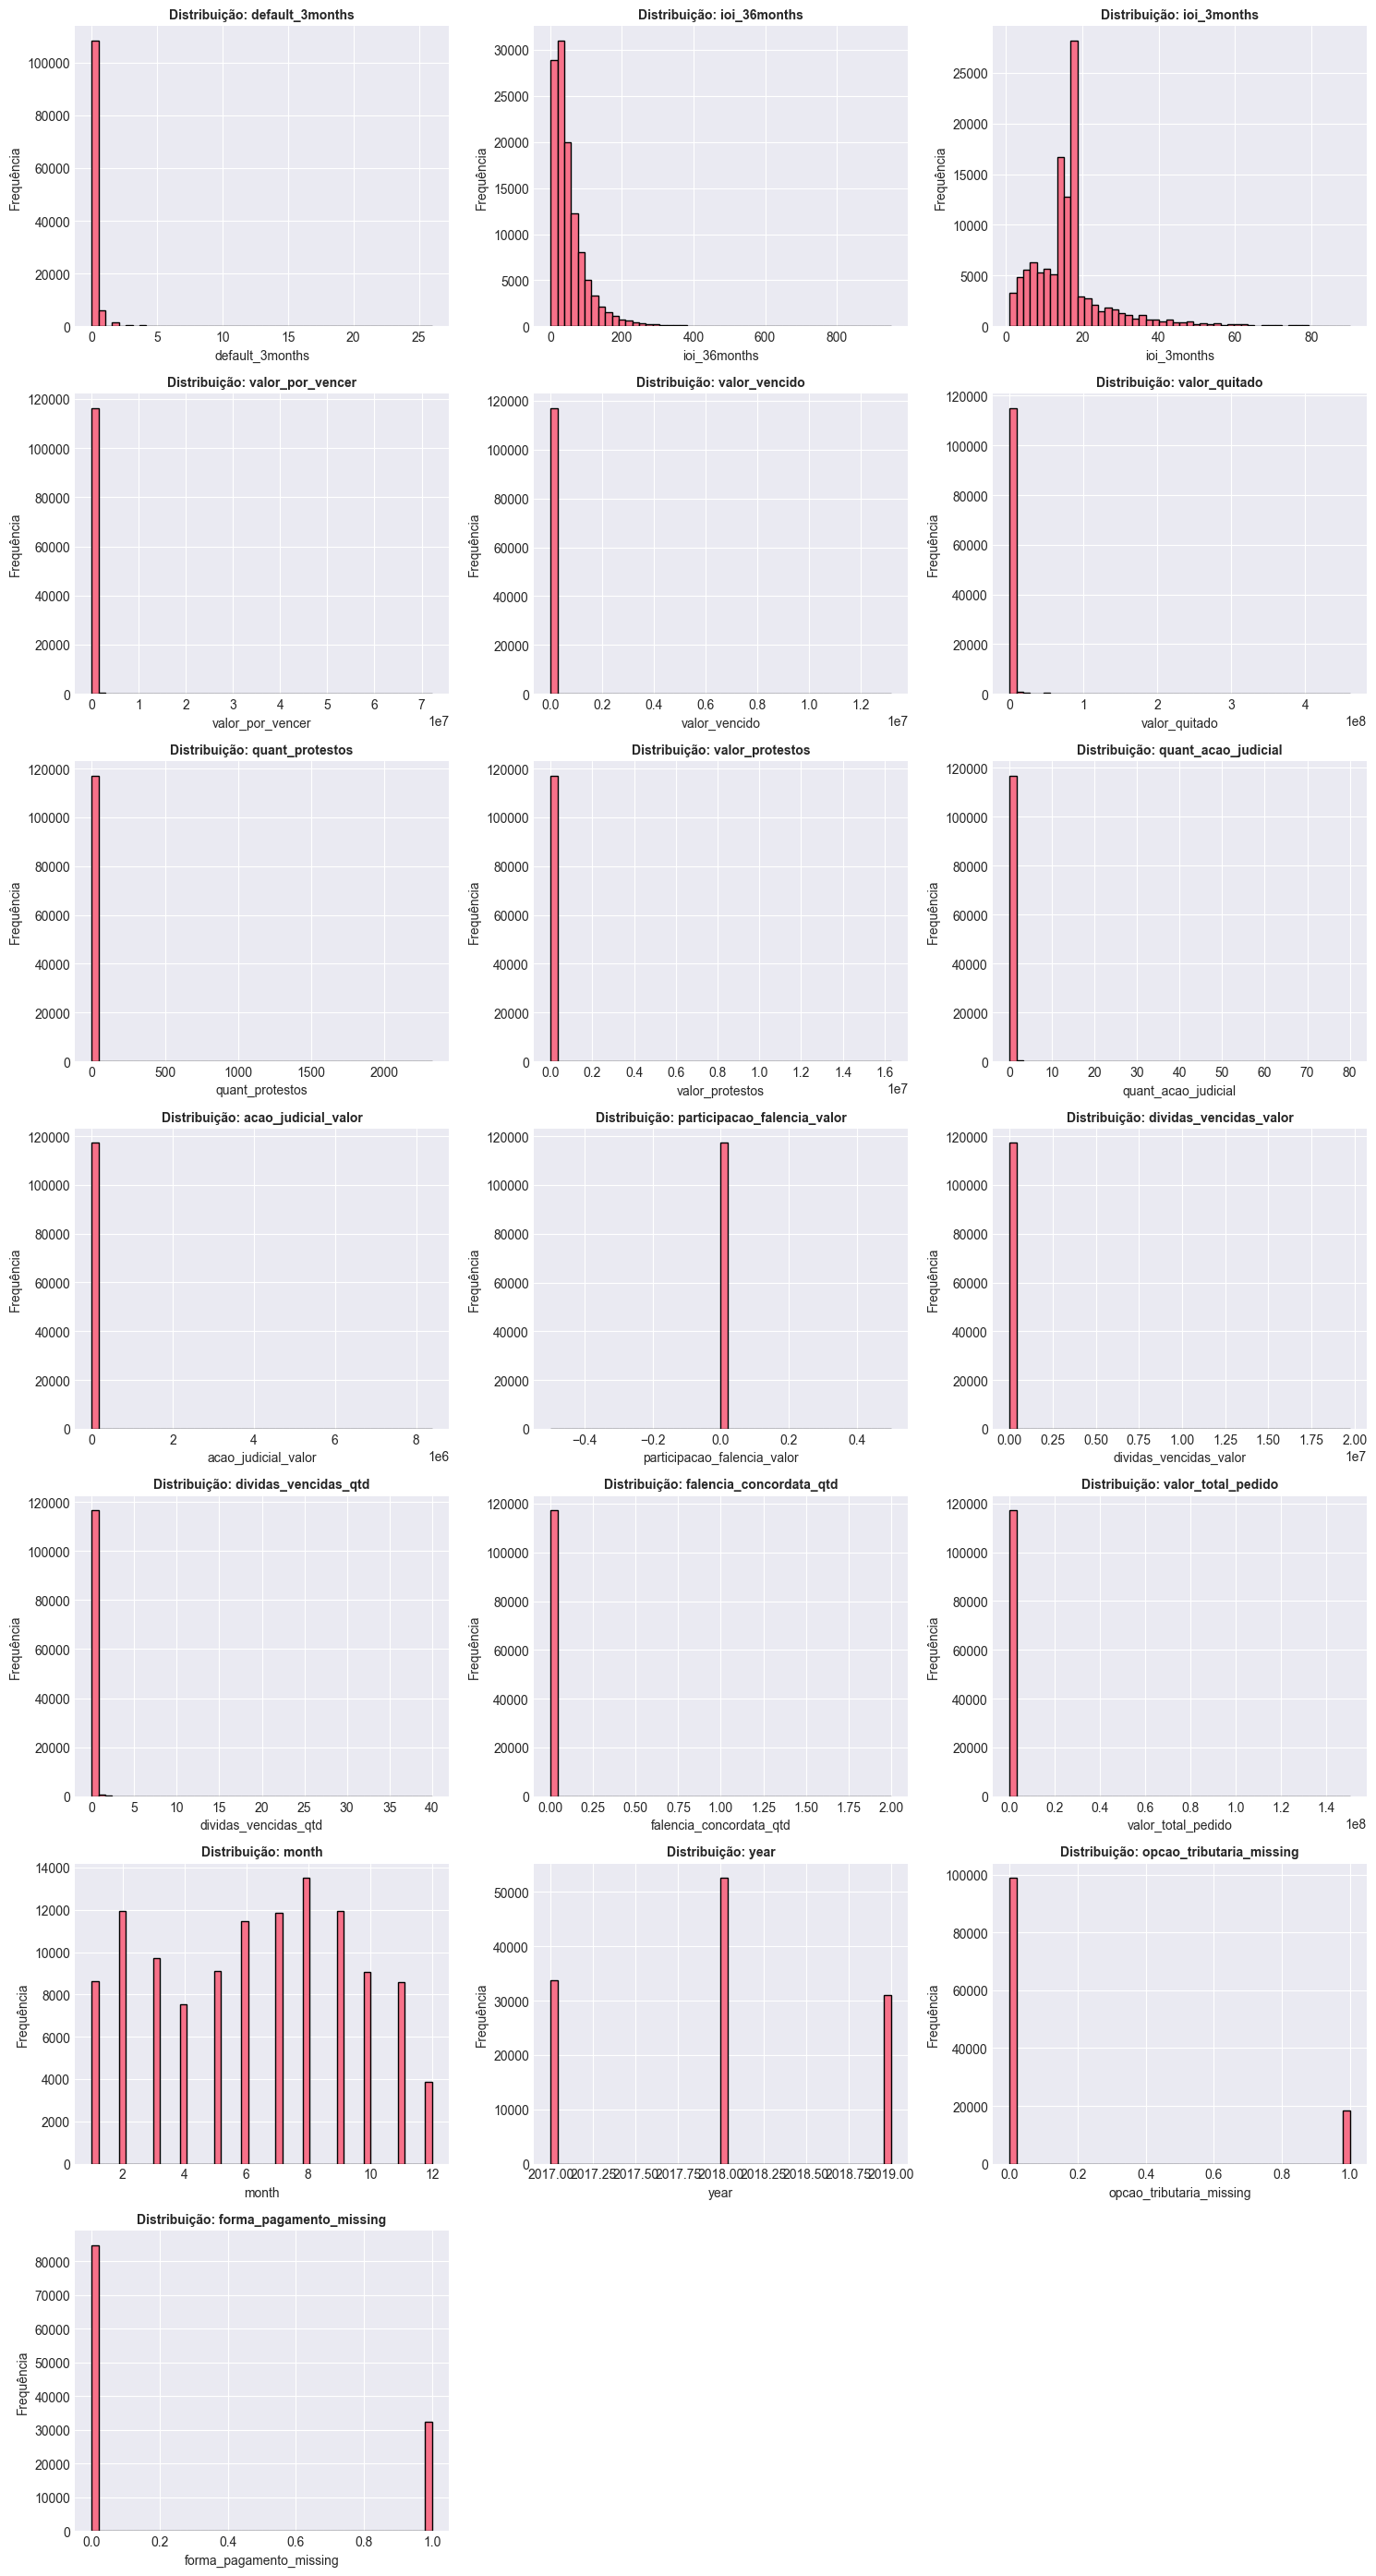

In [17]:
# Distribuições das variáveis numéricas
num_cols_to_plot = [col for col in numeric_cols if col != 'default']
n_cols = 3
n_rows = (len(num_cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(num_cols_to_plot):
    df_clean[col].hist(bins=50, ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribuição: {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequência')

# Remover subplots vazios
for idx in range(len(num_cols_to_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

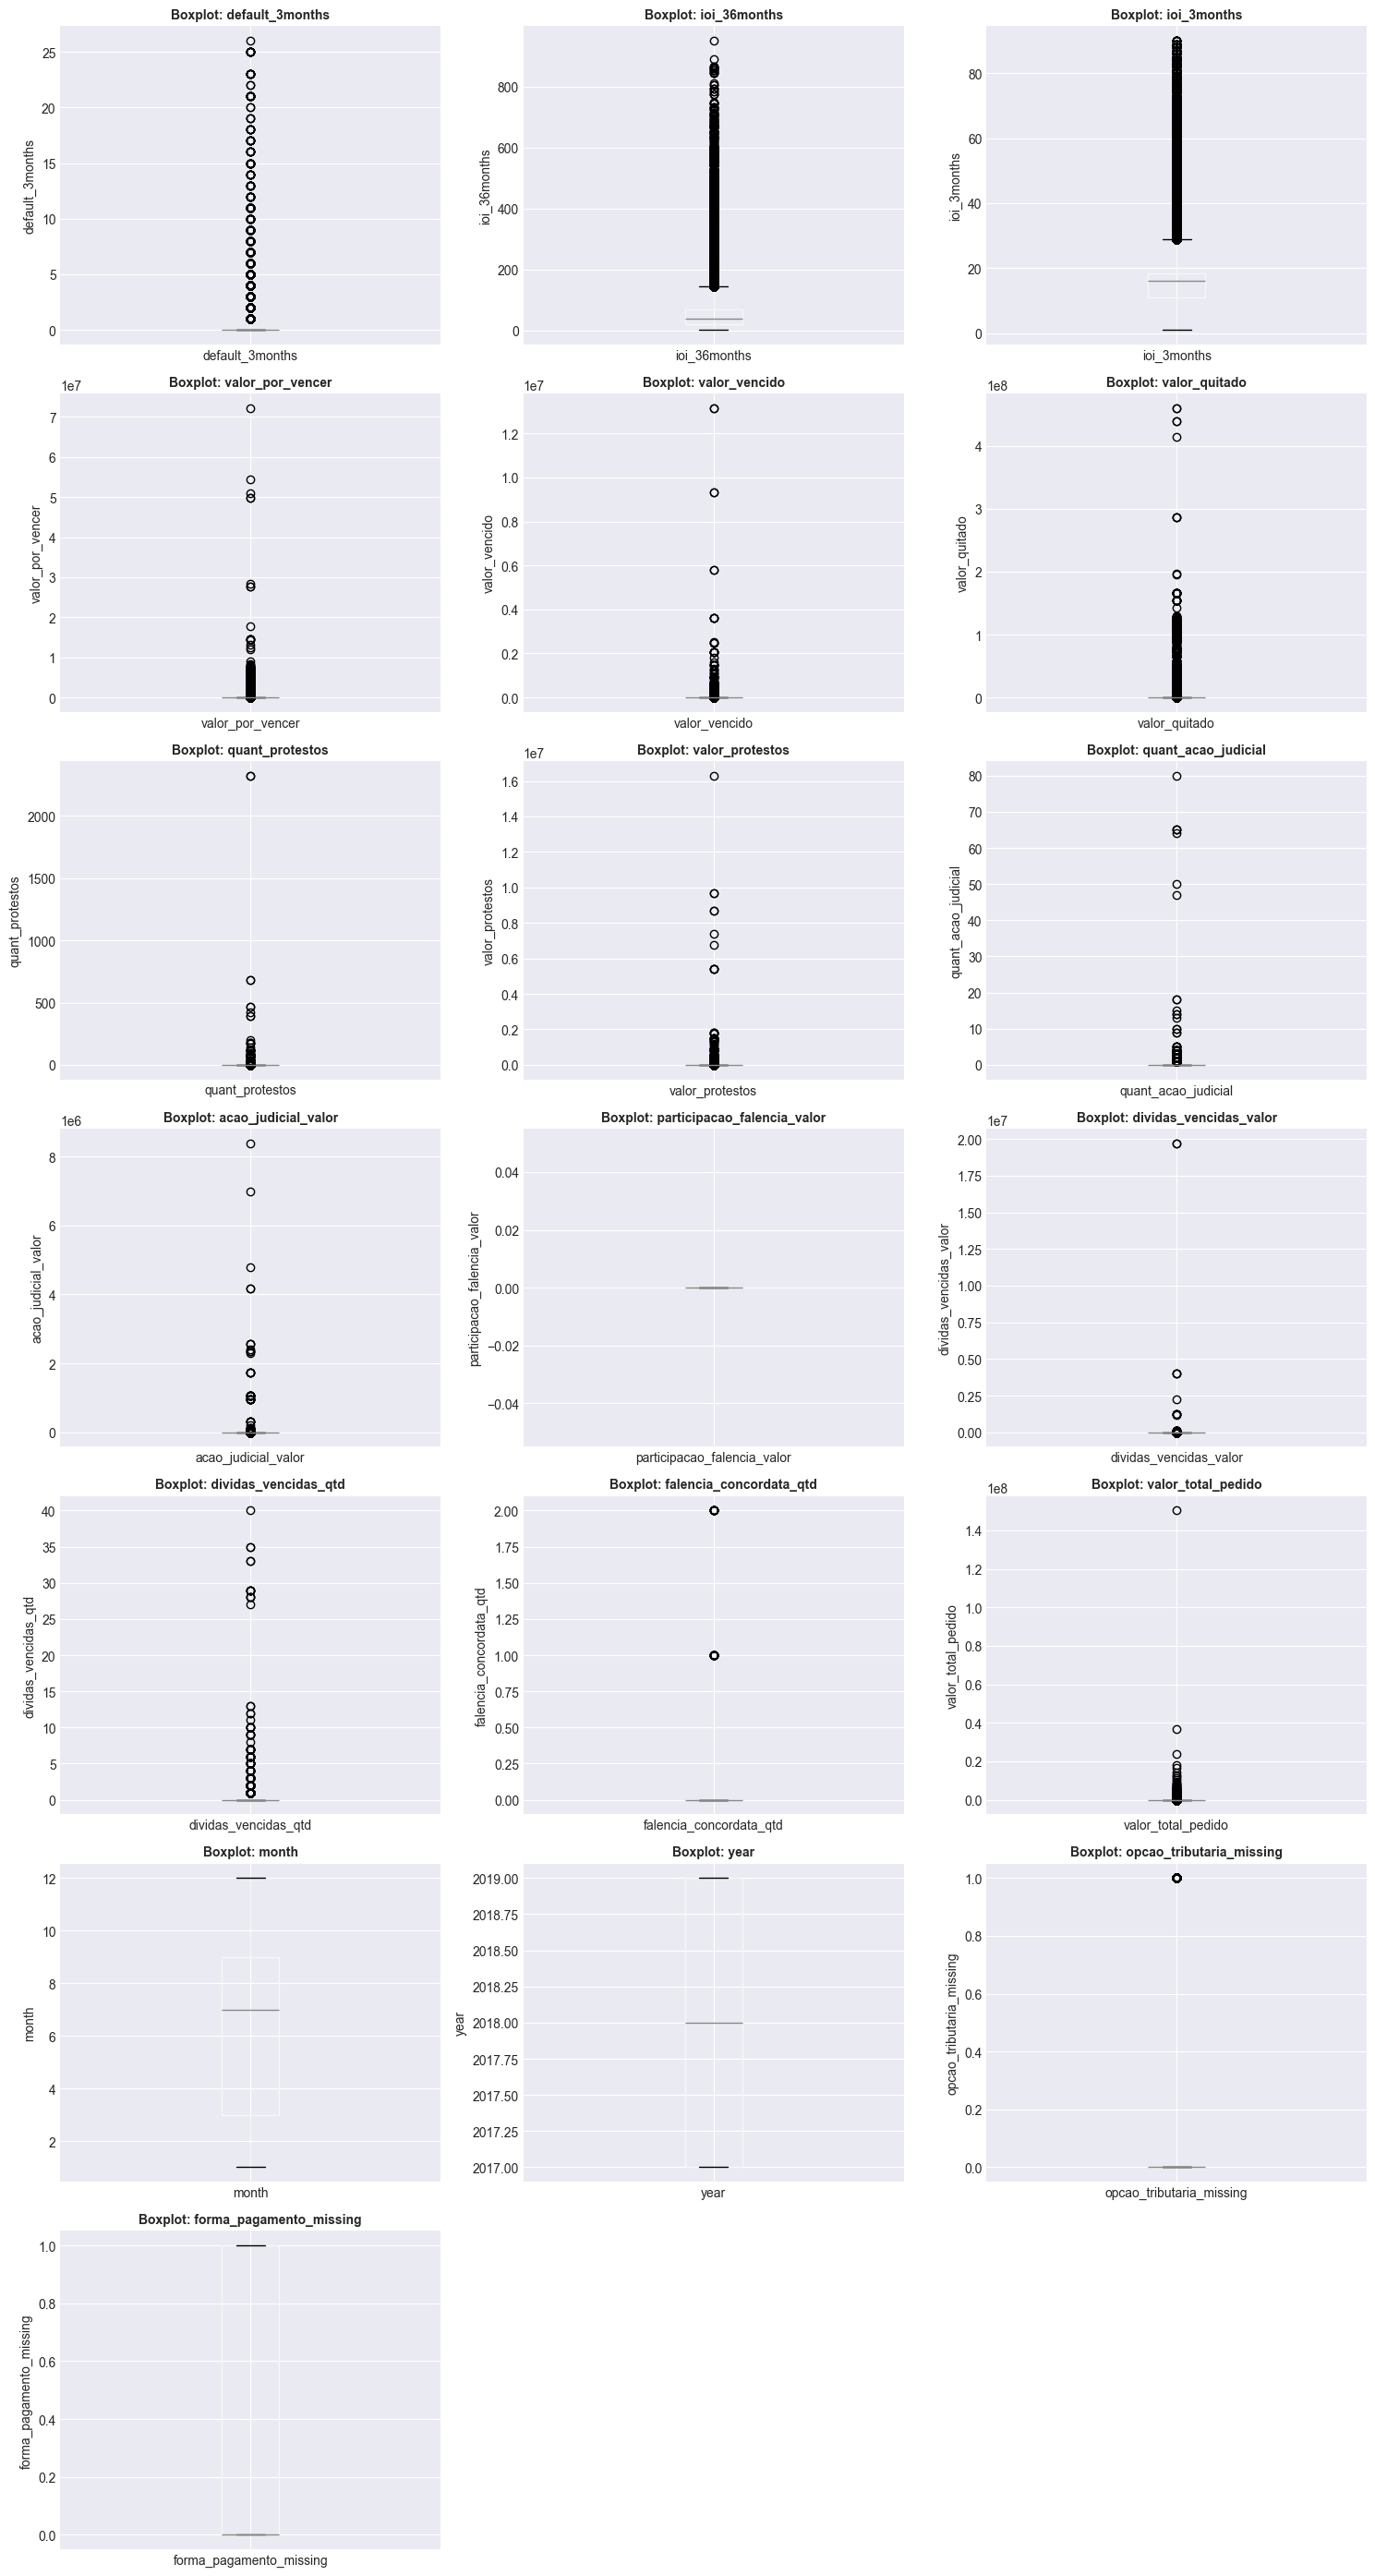

In [18]:
# Boxplots para identificar outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(num_cols_to_plot):
    df_clean.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot: {col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(col)

# Remover subplots vazios
for idx in range(len(num_cols_to_plot), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### 6.1 Auditoria de Valores Negativos e Anomalias Numéricas

Variáveis financeiras podem conter valores negativos que representam estornos, ajustes ou erros de cadastro. Esta análise identifica onde ocorrem e qual sua relação com o default.

In [19]:
# Análise completa de valores negativos
print("="*80)
print("AUDITORIA DE VALORES NEGATIVOS")
print("="*80)

# Variáveis financeiras (excluir month, year, default)
financial_vars = [c for c in num_cols_to_plot if c not in ['month', 'year']]

neg_analysis = []
for col in financial_vars:
    col_data = pd.to_numeric(df_clean[col], errors='coerce')
    n_neg = (col_data < 0).sum()
    n_zero = (col_data == 0).sum()
    n_total = col_data.notna().sum()

    if n_neg > 0:
        neg_vals = col_data[col_data < 0]
        neg_default_rate = df_clean.loc[col_data < 0, 'default'].mean()
        pos_default_rate = df_clean.loc[col_data >= 0, 'default'].mean()
    else:
        neg_default_rate = None
        pos_default_rate = df_clean.loc[col_data >= 0, 'default'].mean()

    neg_analysis.append({
        'Variavel': col,
        'N_Negativos': n_neg,
        'Perc_Negativos': round(n_neg / n_total * 100, 2) if n_total > 0 else 0,
        'N_Zeros': n_zero,
        'Perc_Zeros': round(n_zero / n_total * 100, 2) if n_total > 0 else 0,
        'Min': round(col_data.min(), 2),
        'Max': round(col_data.max(), 2),
        'Default_Negativos': round(neg_default_rate * 100, 2) if neg_default_rate is not None else '-',
        'Default_Positivos': round(pos_default_rate * 100, 2) if pos_default_rate is not None else '-'
    })

df_neg = pd.DataFrame(neg_analysis)
print("\n--- Resumo de Valores Negativos e Zeros ---")
print(df_neg.to_string(index=False))

# Destacar variáveis com negativos
vars_with_neg = df_neg[df_neg['N_Negativos'] > 0]
if len(vars_with_neg) > 0:
    print(f"\n*** {len(vars_with_neg)} variável(is) com valores negativos encontrada(s):")
    for _, row in vars_with_neg.iterrows():
        print(f"  - {row['Variavel']}: {row['N_Negativos']} negativos ({row['Perc_Negativos']}%)")
        print(f"    Taxa default (negativos): {row['Default_Negativos']}% vs (positivos): {row['Default_Positivos']}%")
else:
    print("\nNenhuma variável com valores negativos encontrada.")

# Variáveis com alta concentração de zeros
vars_high_zeros = df_neg[df_neg['Perc_Zeros'] > 50]
if len(vars_high_zeros) > 0:
    print(f"\n*** {len(vars_high_zeros)} variável(is) com >50% de zeros (distribuição esparsa):")
    for _, row in vars_high_zeros.iterrows():
        print(f"  - {row['Variavel']}: {row['Perc_Zeros']}% zeros")

AUDITORIA DE VALORES NEGATIVOS

--- Resumo de Valores Negativos e Zeros ---
                   Variavel  N_Negativos  Perc_Negativos  N_Zeros  Perc_Zeros      Min           Max Default_Negativos  Default_Positivos
            default_3months            0           0.000   108379      92.420    0.000        26.000                 -             16.670
               ioi_36months            0           0.000        0       0.000    1.000       951.000                 -             16.670
                ioi_3months            0           0.000        0       0.000    1.000        90.000                 -             16.670
           valor_por_vencer            0           0.000    24962      21.290    0.000  72197586.360                 -             16.670
              valor_vencido            0           0.000   104848      89.410    0.000  13150500.000                 -             16.670
              valor_quitado            0           0.000     4660       3.970    0.000 460320322

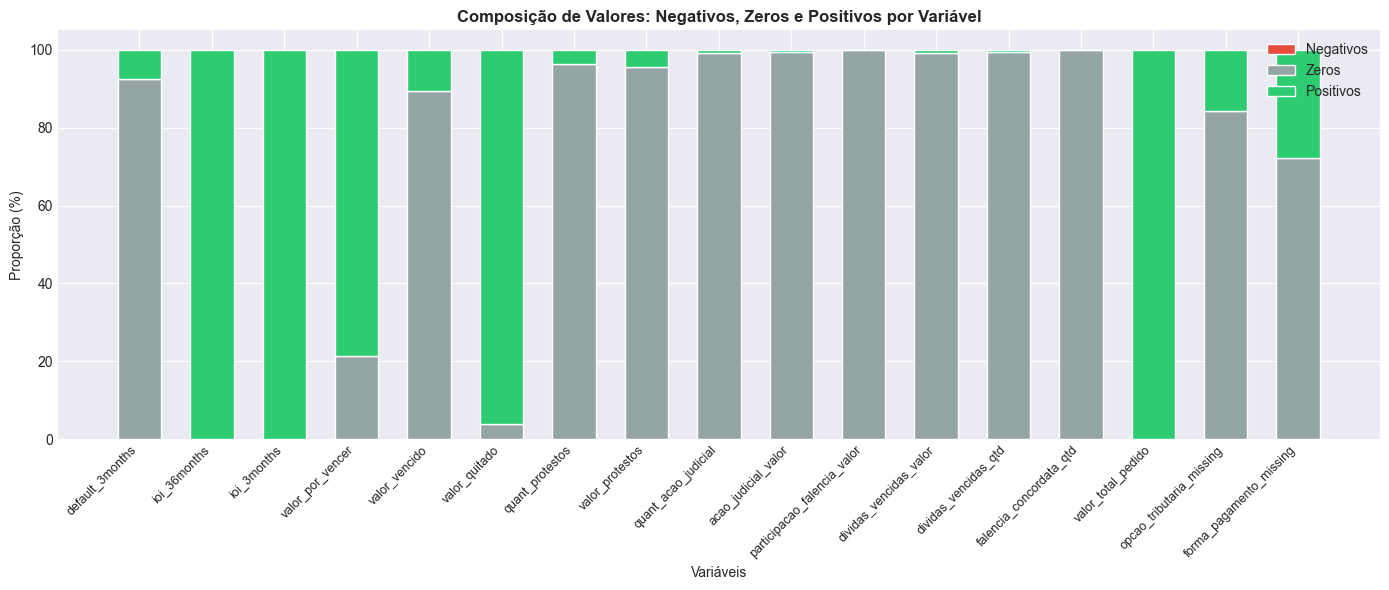

In [20]:
# Visualização: proporção de negativos, zeros e positivos por variável
financial_vars = [c for c in num_cols_to_plot if c not in ['month', 'year']]

fig, ax = plt.subplots(figsize=(14, 6))

categories = {'Negativos': [], 'Zeros': [], 'Positivos': []}
labels = []

for col in financial_vars:
    col_data = pd.to_numeric(df_clean[col], errors='coerce').dropna()
    total = len(col_data)
    categories['Negativos'].append((col_data < 0).sum() / total * 100)
    categories['Zeros'].append((col_data == 0).sum() / total * 100)
    categories['Positivos'].append((col_data > 0).sum() / total * 100)
    labels.append(col)

x = np.arange(len(labels))
width = 0.6

bottom = np.zeros(len(labels))
colors = {'Negativos': '#e74c3c', 'Zeros': '#95a5a6', 'Positivos': '#2ecc71'}

for cat_name, values in categories.items():
    ax.bar(x, values, width, label=cat_name, bottom=bottom, color=colors[cat_name], edgecolor='white')
    bottom += np.array(values)

ax.set_xlabel('Variáveis')
ax.set_ylabel('Proporção (%)')
ax.set_title('Composição de Valores: Negativos, Zeros e Positivos por Variável', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
ax.legend()
ax.set_ylim(0, 105)
plt.tight_layout()
plt.show()

### 6.2 Análise Estatística Avançada: Distribuições por Default

Comparação detalhada das distribuições numéricas entre inadimplentes (default=1) e adimplentes (default=0) usando testes estatísticos (Mann-Whitney U) e métricas de forma (assimetria e curtose).

In [21]:
# Análise estatística comparativa: Default=0 vs Default=1
from scipy.stats import mannwhitneyu, skew, kurtosis

print("="*80)
print("TESTES ESTATISTICOS: COMPARACAO DEFAULT=0 vs DEFAULT=1")
print("="*80)

financial_vars = [c for c in num_cols_to_plot if c not in ['month', 'year']]
df_0 = df_clean[df_clean['default'] == 0]
df_1 = df_clean[df_clean['default'] == 1]

stats_results = []
for col in financial_vars:
    vals_0 = pd.to_numeric(df_0[col], errors='coerce').dropna()
    vals_1 = pd.to_numeric(df_1[col], errors='coerce').dropna()

    # Mann-Whitney U test (non-parametric)
    if len(vals_0) > 0 and len(vals_1) > 0:
        stat_u, p_val = mannwhitneyu(vals_0, vals_1, alternative='two-sided')
    else:
        stat_u, p_val = None, None

    # Effect size (rank-biserial correlation r = 1 - 2U/(n1*n2))
    n1, n2 = len(vals_0), len(vals_1)
    if stat_u is not None and n1 > 0 and n2 > 0:
        r_effect = 1 - (2 * stat_u) / (n1 * n2)
    else:
        r_effect = None

    # Skewness and kurtosis
    all_vals = pd.to_numeric(df_clean[col], errors='coerce').dropna()
    sk = skew(all_vals)
    kt = kurtosis(all_vals)

    stats_results.append({
        'Variavel': col,
        'Media_D0': round(vals_0.mean(), 2),
        'Media_D1': round(vals_1.mean(), 2),
        'Mediana_D0': round(vals_0.median(), 2),
        'Mediana_D1': round(vals_1.median(), 2),
        'p_value': f'{p_val:.2e}' if p_val is not None else '-',
        'Significativo': 'Sim' if p_val is not None and p_val < 0.05 else 'Nao',
        'Effect_Size_r': round(r_effect, 4) if r_effect is not None else '-',
        'Assimetria': round(sk, 2),
        'Curtose': round(kt, 2)
    })

df_stats = pd.DataFrame(stats_results)
print("\n--- Resumo Estatístico Comparativo ---")
print(df_stats.to_string(index=False))

# Variáveis com diferença significativa
sig_vars = df_stats[df_stats['Significativo'] == 'Sim']
print(f"\n*** {len(sig_vars)}/{len(df_stats)} variáveis com diferença significativa (p<0.05) entre default=0 e default=1")

# Ranking por tamanho do efeito
print("\n--- Ranking por Effect Size (|r|) ---")
df_stats_ranked = df_stats[df_stats['Effect_Size_r'] != '-'].copy()
df_stats_ranked['abs_r'] = df_stats_ranked['Effect_Size_r'].astype(float).abs()
df_stats_ranked = df_stats_ranked.sort_values('abs_r', ascending=False)
for _, row in df_stats_ranked.iterrows():
    magnitude = 'Grande' if abs(float(row['Effect_Size_r'])) > 0.5 else 'Medio' if abs(float(row['Effect_Size_r'])) > 0.3 else 'Pequeno'
    print(f"  {row['Variavel']}: r={row['Effect_Size_r']} ({magnitude})")

TESTES ESTATISTICOS: COMPARACAO DEFAULT=0 vs DEFAULT=1

--- Resumo Estatístico Comparativo ---
                   Variavel    Media_D0   Media_D1  Mediana_D0  Mediana_D1   p_value Significativo  Effect_Size_r  Assimetria   Curtose
            default_3months       0.060      0.570       0.000       0.000  0.00e+00           Sim          0.194      13.760   273.050
               ioi_36months      54.230     62.330      36.500      45.600 2.82e-207           Sim          0.139       3.890    25.850
                ioi_3months      17.080     17.220      16.000      16.400  5.99e-25           Sim          0.047       2.300     8.300
           valor_por_vencer   69799.020  36287.080    4439.620    4531.610  4.31e-03           Sim          0.013      62.210  6415.160
              valor_vencido    2685.700   1295.710       0.000       0.000  0.00e+00           Sim          0.125     111.600 15549.640
              valor_quitado 1206174.720 482451.890   86804.890   59610.710  1.70e-97     

Top 6 variáveis por effect size: ['default_3months', 'ioi_36months', 'valor_vencido', 'valor_total_pedido', 'valor_quitado', 'opcao_tributaria_missing']


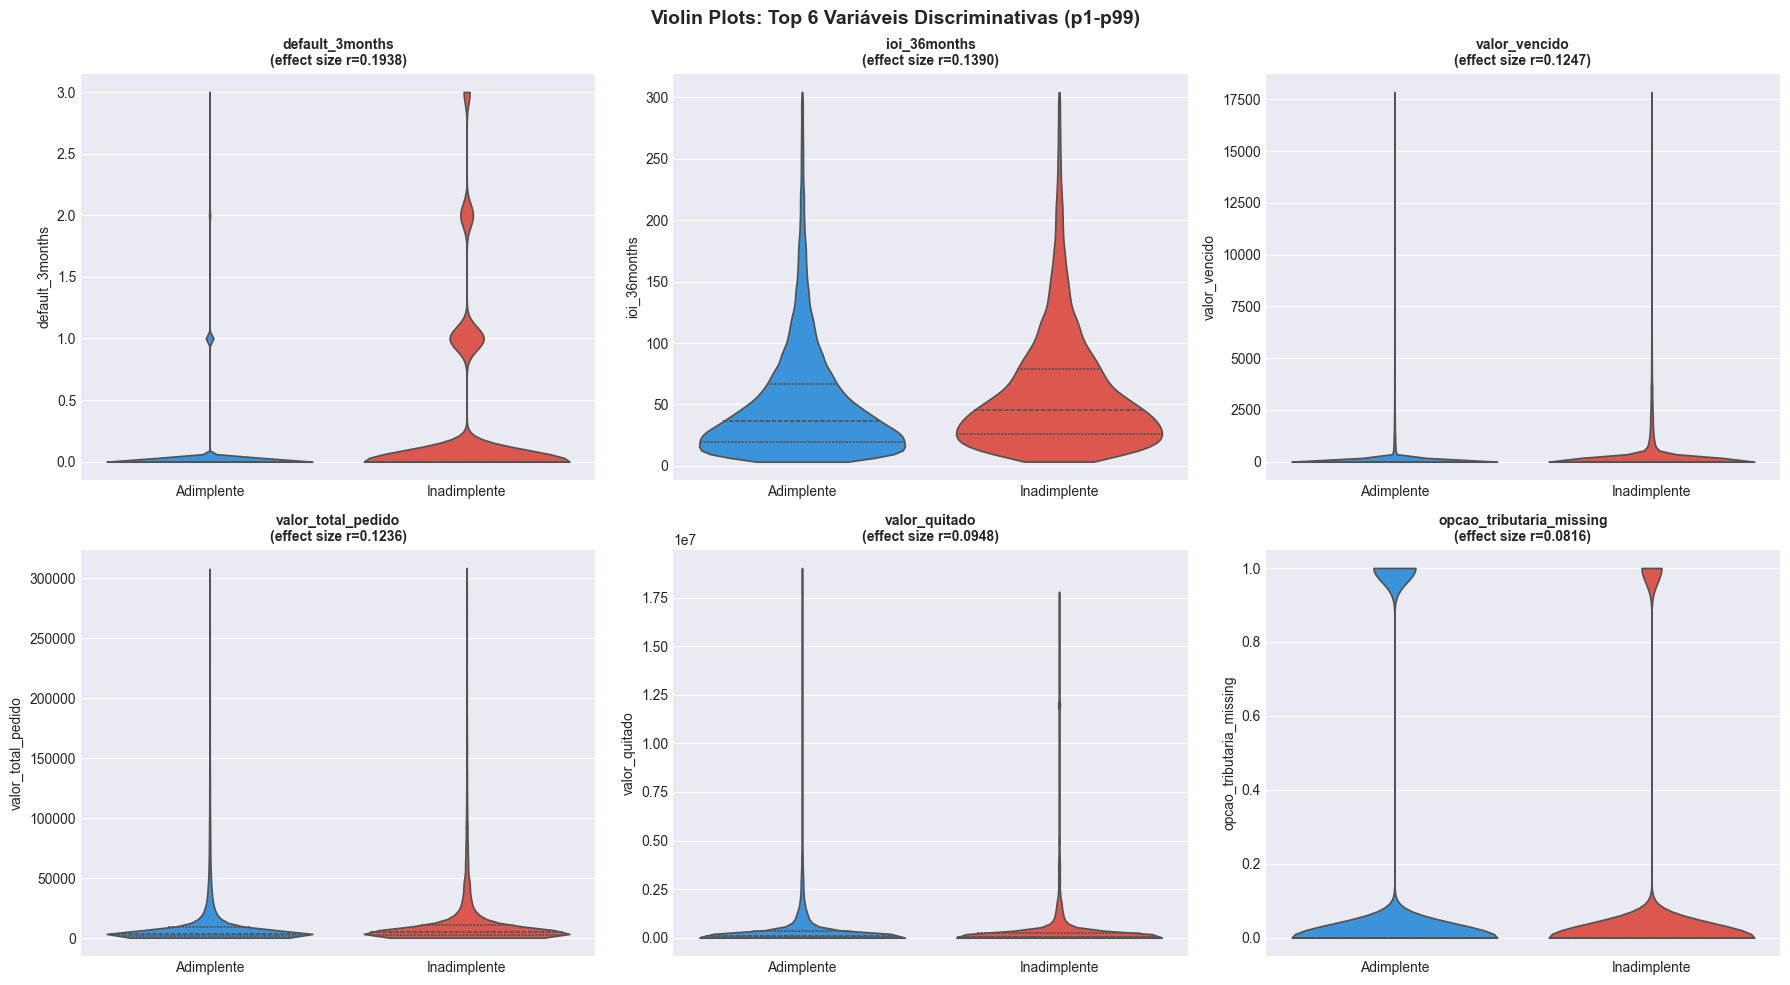

In [23]:
# Violin plots das variáveis com maior poder discriminativo
# Selecionar top 6 variáveis por effect size
financial_vars = [c for c in num_cols_to_plot if c not in ['month', 'year']]
df_0 = df_clean[df_clean['default'] == 0]
df_1 = df_clean[df_clean['default'] == 1]

effect_sizes = {}
for col in financial_vars:
    vals_0 = pd.to_numeric(df_0[col], errors='coerce').dropna()
    vals_1 = pd.to_numeric(df_1[col], errors='coerce').dropna()
    if len(vals_0) > 0 and len(vals_1) > 0:
        stat_u, _ = mannwhitneyu(vals_0, vals_1, alternative='two-sided')
        r = abs(1 - (2 * stat_u) / (len(vals_0) * len(vals_1)))
        effect_sizes[col] = r

top_vars = sorted(effect_sizes, key=effect_sizes.get, reverse=True)[:6]
print(f"Top 6 variáveis por effect size: {top_vars}")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(top_vars):
    ax = axes[idx]
    col_data = pd.to_numeric(df_clean[col], errors='coerce')

    # Usar percentis para remover outliers extremos na visualização
    q01 = col_data.quantile(0.01)
    q99 = col_data.quantile(0.99)
    mask = (col_data >= q01) & (col_data <= q99)

    plot_df = pd.DataFrame({
        'valor': col_data[mask],
        'default': df_clean.loc[mask, 'default'].map({0: 'Adimplente', 1: 'Inadimplente'})
    }).dropna()

    sns.violinplot(data=plot_df, x='default', y='valor', ax=ax,
                   palette={'Adimplente': '#2196F3', 'Inadimplente': '#F44336'},
                   inner='quartile', cut=0)
    ax.set_title(f'{col}\n(effect size r={effect_sizes[col]:.4f})', fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel(col)

fig.suptitle('Violin Plots: Top 6 Variáveis Discriminativas (p1-p99)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

ANALISE DE ESPARSIDADE: ZEROS vs NAO-ZEROS POR DEFAULT
                   Variavel  Perc_Zeros  Default_Zeros_%  Default_NaoZeros_%  Diferenca_pp
            default_3months      92.400           13.800              51.630        37.830
              valor_vencido      89.400           14.640              33.780        19.140
            valor_protestos      95.600           16.310              24.470         8.160
           valor_por_vencer      21.300           11.680              18.020         6.340
    forma_pagamento_missing      72.300           15.590              19.470         3.880
     dividas_vencidas_valor      99.300           16.640              20.030         3.380
            quant_protestos      96.300           16.860              11.760        -5.100
       dividas_vencidas_qtd      99.400           16.700              11.130        -5.570
        acao_judicial_valor      99.500           16.690              10.850        -5.840
   opcao_tributaria_missing      84

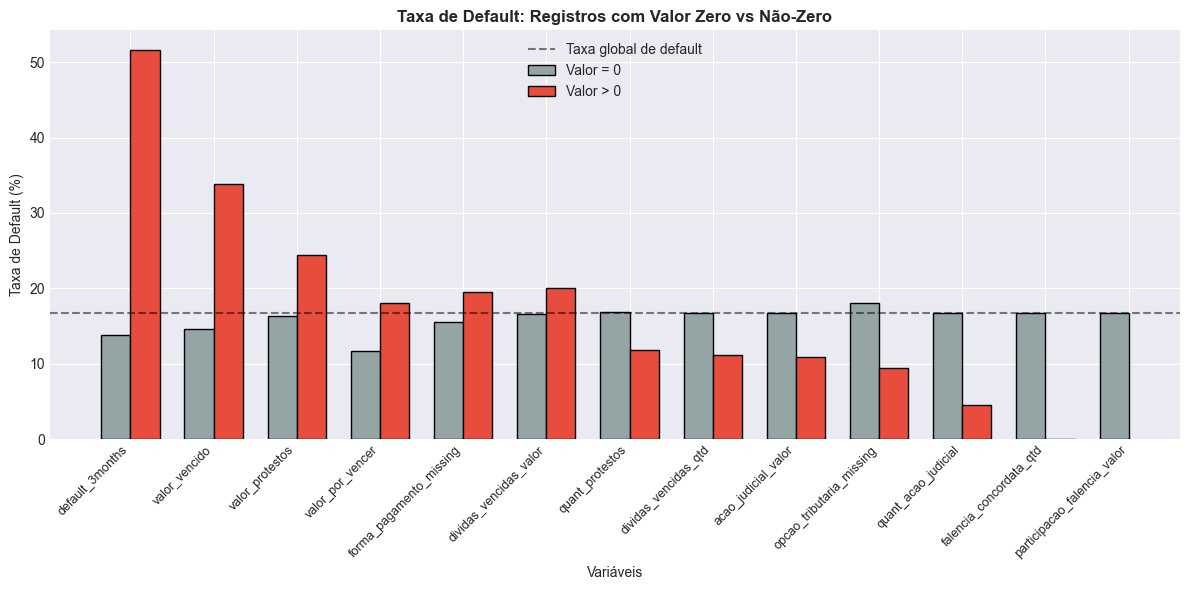


*** Insight: Variáveis esparsas (muitos zeros) podem gerar features binárias indicando presença/ausência do evento.


In [24]:
# Análise: comportamento de zeros vs não-zeros por variável e default
financial_vars = [c for c in num_cols_to_plot if c not in ['month', 'year']]

# Selecionar variáveis com proporção significativa de zeros (>5%)
sparse_vars = []
for col in financial_vars:
    col_data = pd.to_numeric(df_clean[col], errors='coerce').dropna()
    perc_zeros = (col_data == 0).sum() / len(col_data) * 100
    if perc_zeros > 5:
        sparse_vars.append(col)

if len(sparse_vars) > 0:
    print("="*80)
    print("ANALISE DE ESPARSIDADE: ZEROS vs NAO-ZEROS POR DEFAULT")
    print("="*80)

    sparsity_results = []
    for col in sparse_vars:
        col_data = pd.to_numeric(df_clean[col], errors='coerce')
        is_zero = (col_data == 0)

        default_rate_zero = df_clean.loc[is_zero & col_data.notna(), 'default'].mean() * 100
        default_rate_nonzero = df_clean.loc[~is_zero & col_data.notna(), 'default'].mean() * 100
        perc_zeros = is_zero.sum() / col_data.notna().sum() * 100

        sparsity_results.append({
            'Variavel': col,
            'Perc_Zeros': round(perc_zeros, 1),
            'Default_Zeros_%': round(default_rate_zero, 2),
            'Default_NaoZeros_%': round(default_rate_nonzero, 2),
            'Diferenca_pp': round(default_rate_nonzero - default_rate_zero, 2)
        })

    df_sparsity = pd.DataFrame(sparsity_results).sort_values('Diferenca_pp', ascending=False)
    print(df_sparsity.to_string(index=False))

    # Visualização
    fig, ax = plt.subplots(figsize=(12, 6))
    x = np.arange(len(df_sparsity))
    width = 0.35

    ax.bar(x - width/2, df_sparsity['Default_Zeros_%'], width, label='Valor = 0', color='#95a5a6', edgecolor='black')
    ax.bar(x + width/2, df_sparsity['Default_NaoZeros_%'], width, label='Valor > 0', color='#e74c3c', edgecolor='black')
    ax.axhline(y=df_clean['default'].mean()*100, color='black', linestyle='--', alpha=0.5, label='Taxa global de default')

    ax.set_xlabel('Variáveis')
    ax.set_ylabel('Taxa de Default (%)')
    ax.set_title('Taxa de Default: Registros com Valor Zero vs Não-Zero', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(df_sparsity['Variavel'], rotation=45, ha='right', fontsize=9)
    ax.legend()
    plt.tight_layout()
    plt.show()

    print("\n*** Insight: Variáveis esparsas (muitos zeros) podem gerar features binárias indicando presença/ausência do evento.")
else:
    print("Nenhuma variável com proporção significativa de zeros encontrada.")

## 7. Análise Univariada - Variáveis Categóricas

In [26]:
# Identificar colunas categóricas
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Variáveis categóricas ({len(categorical_cols)}): {categorical_cols}")

Variáveis categóricas (5): ['tipo_sociedade', 'opcao_tributaria', 'atividade_principal', 'forma_pagamento', 'date_str']


In [166]:
# Análise de cada variável categórica
for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"Variável: {col}")
    print(f"{'='*60}")
    print(f"Valores únicos: {df_clean[col].nunique()}")
    print("\nTop 10 categorias:")
    print(df_clean[col].value_counts().head(10))


Variável: tipo_sociedade
Valores únicos: 16

Top 10 categorias:
tipo_sociedade
sociedade empresaria limitada                     60020
empresario (individual)                           27055
empresa individual respons limitada empresaria    19201
empresario-mei(microempreendedor individual)       6886
sociedade anonima fechada                          2482
cooperativa                                         567
sociedade simples limitada                          121
outras formas de associacao                         106
sociedade anonima aberta                             80
fundacao privada                                     49
Name: count, dtype: int64

Variável: opcao_tributaria
Valores únicos: 4

Top 10 categorias:
opcao_tributaria
simples nacional    87993
lucro real           7807
lucro presumido      2757
isento                391
Name: count, dtype: int64

Variável: atividade_principal
Valores únicos: 203

Top 10 categorias:
atividade_principal
com de equipamentos de informa

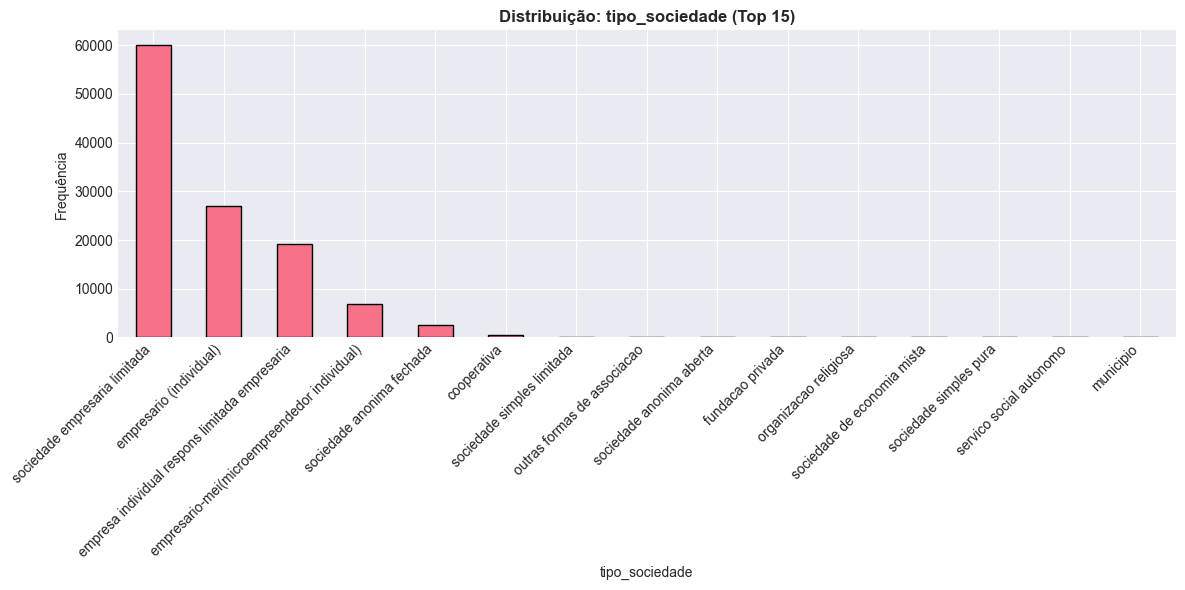

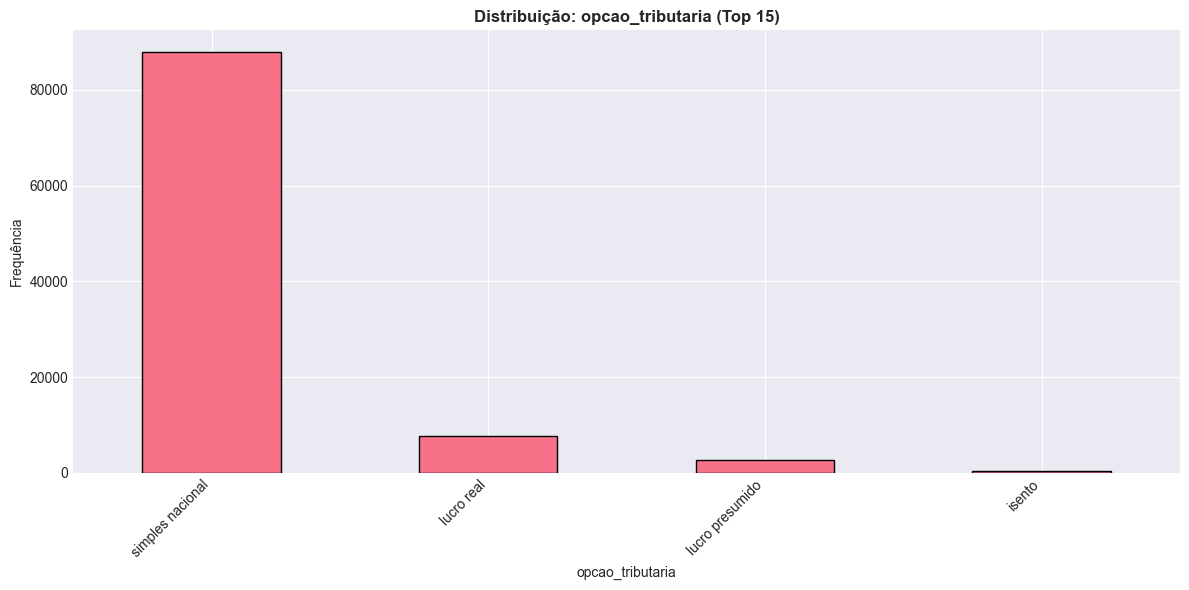

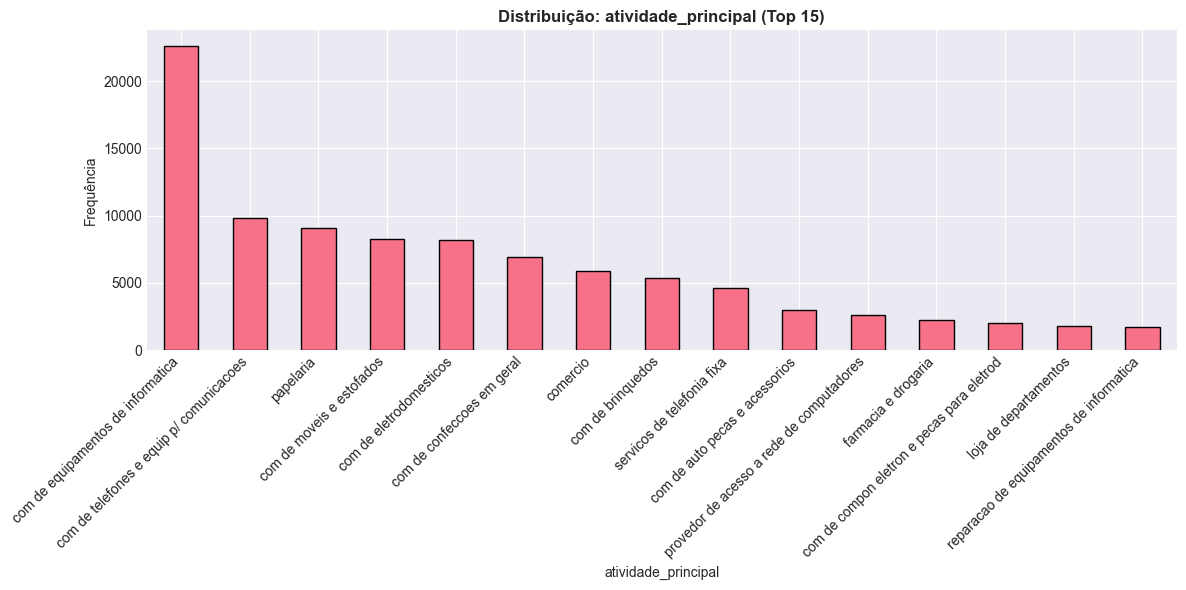

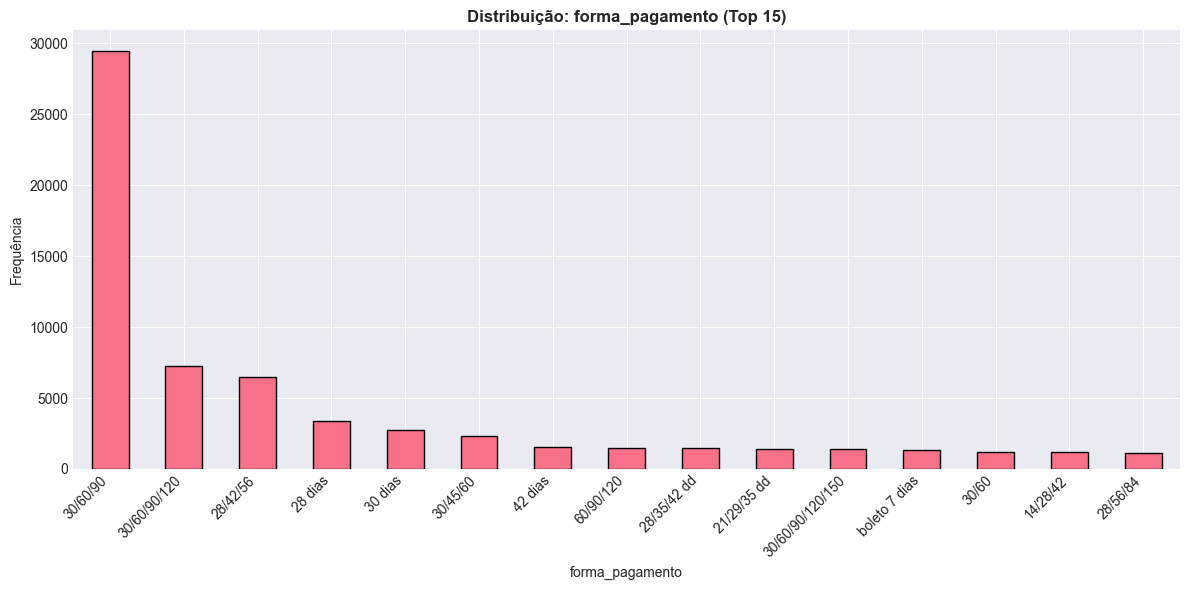

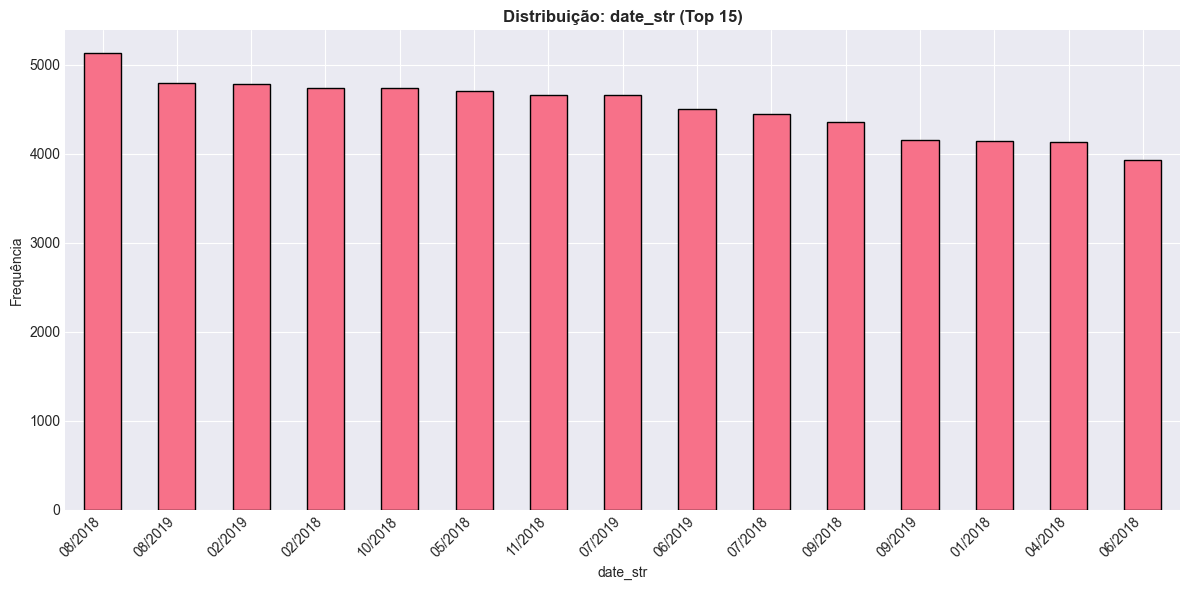

In [27]:
# Visualização das variáveis categóricas
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    value_counts = df_clean[col].value_counts().head(15)
    value_counts.plot(kind='bar', edgecolor='black')
    plt.title(f'Distribuição: {col} (Top 15)', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 8. Análise Bivariada - Variáveis vs Default

In [28]:
# Taxa de default por variáveis categóricas
for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"Taxa de Default por {col}")
    print(f"{'='*60}")
    
    default_rate_by_cat = df_clean.groupby(col)['default'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    default_rate_by_cat['mean'] = default_rate_by_cat['mean'] * 100
    default_rate_by_cat.columns = ['Taxa_Default_%', 'Contagem']
    print(default_rate_by_cat.head(10))


Taxa de Default por tipo_sociedade
                                                Taxa_Default_%  Contagem
tipo_sociedade                                                          
sociedade simples limitada                              63.636       121
organizacao religiosa                                   33.333        33
empresario-mei(microempreendedor individual)            23.715      6886
empresario (individual)                                 21.013     27055
cooperativa                                             15.344       567
empresa individual respons limitada empresaria          15.176     19201
sociedade anonima fechada                               14.746      2482
sociedade empresaria limitada                           14.523     60020
outras formas de associacao                              3.774       106
fundacao privada                                         2.041        49

Taxa de Default por opcao_tributaria
                  Taxa_Default_%  Contagem
opcao_t

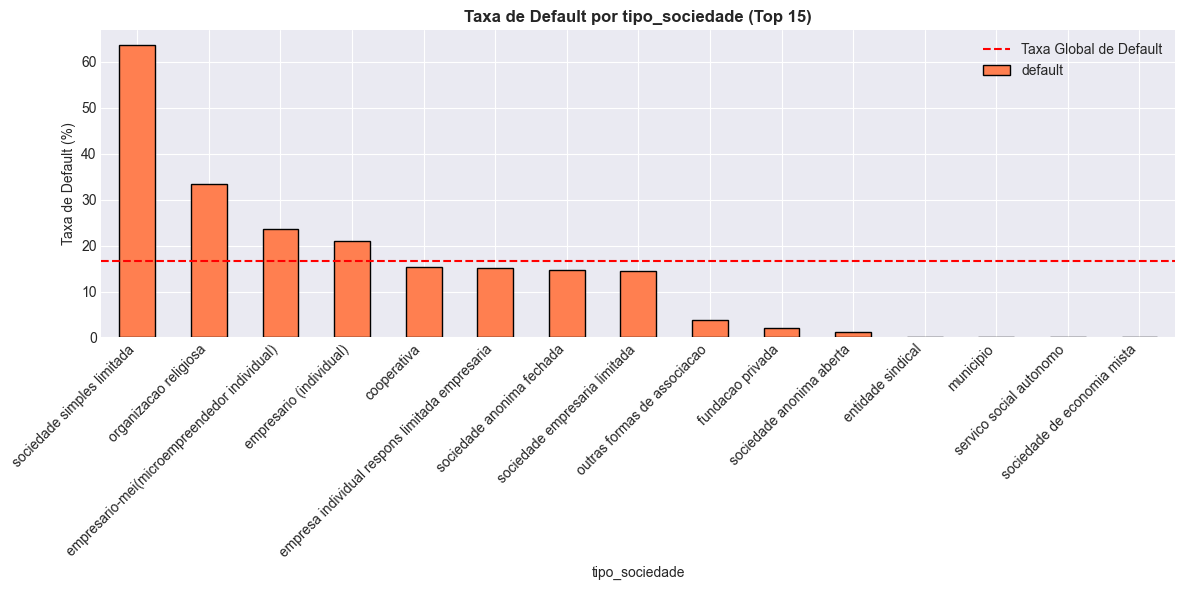

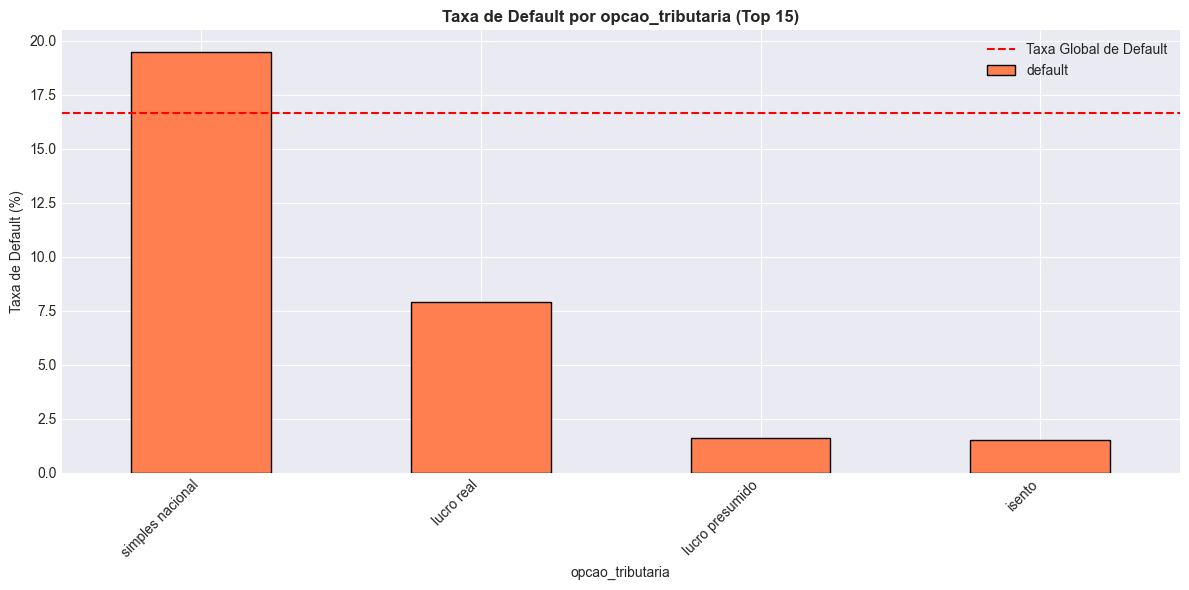

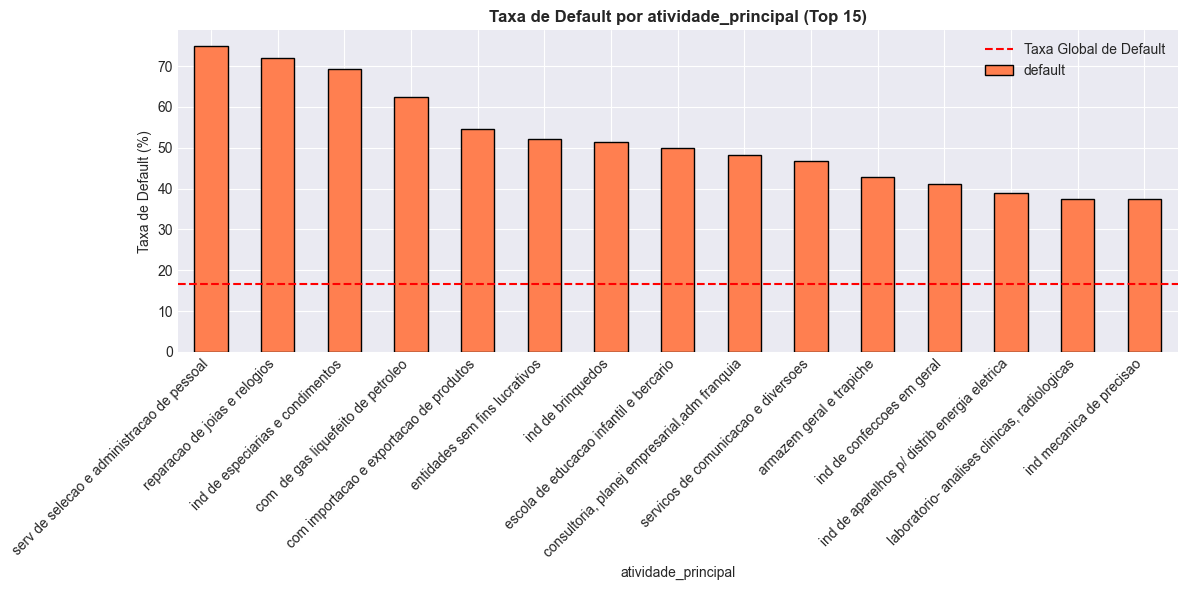

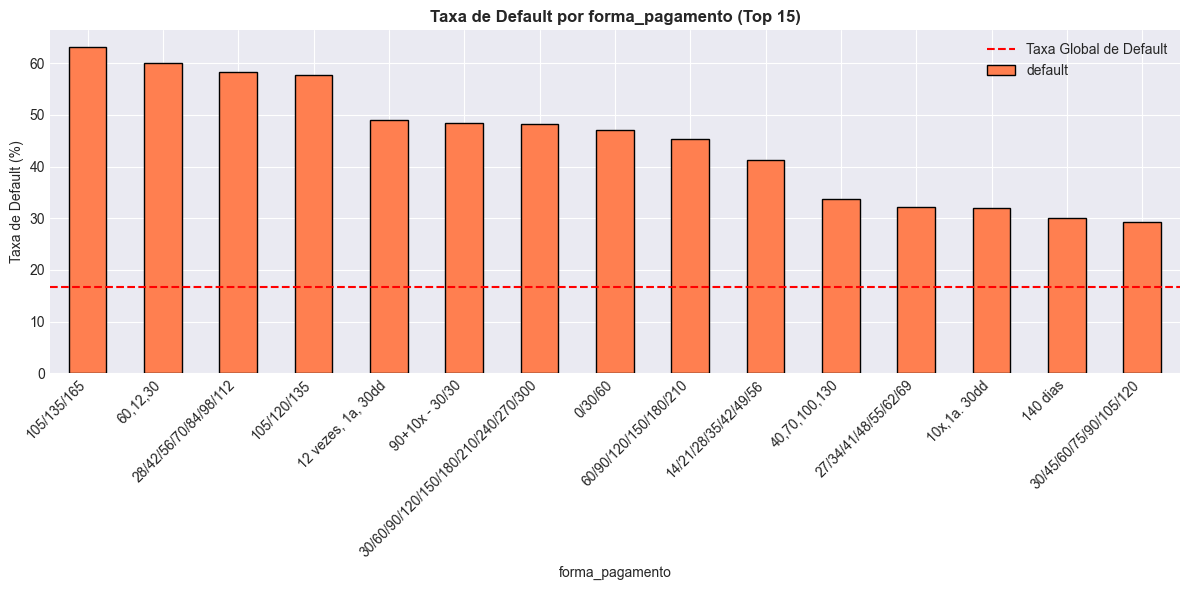

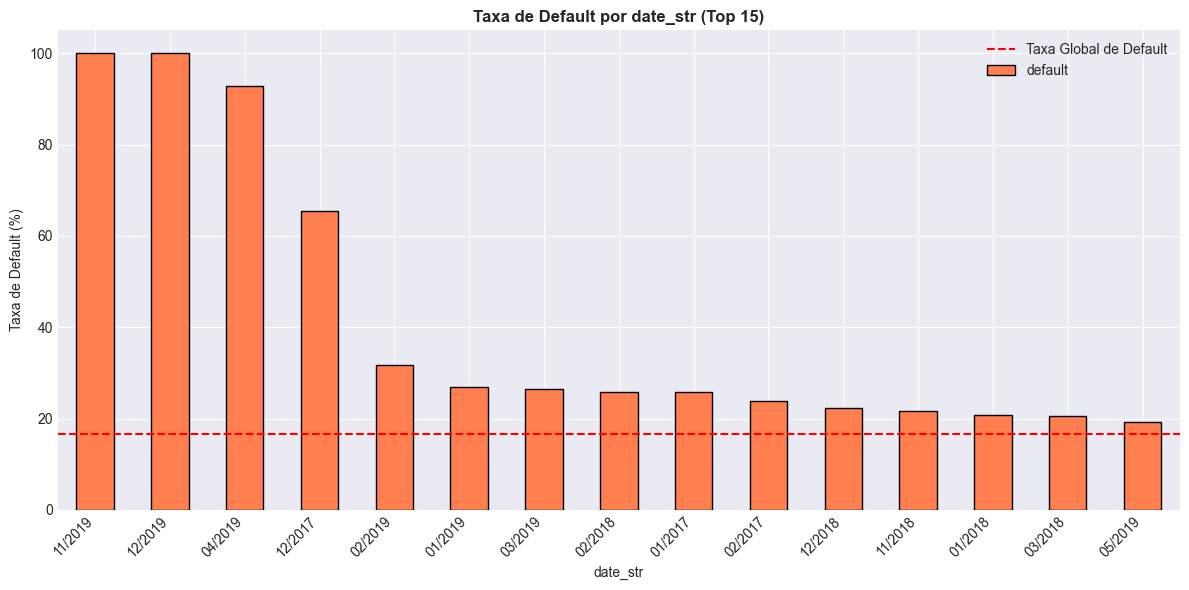

In [29]:
# Visualização da taxa de default por categoria
for col in categorical_cols:
    default_rate_by_cat = df_clean.groupby(col)['default'].mean().sort_values(ascending=False).head(15) * 100
    
    plt.figure(figsize=(12, 6))
    default_rate_by_cat.plot(kind='bar', color='coral', edgecolor='black')
    plt.title(f'Taxa de Default por {col} (Top 15)', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Taxa de Default (%)')
    plt.axhline(y=df_clean['default'].mean() * 100, color='red', linestyle='--', label='Taxa Global de Default')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

<Figure size 1000x500 with 0 Axes>

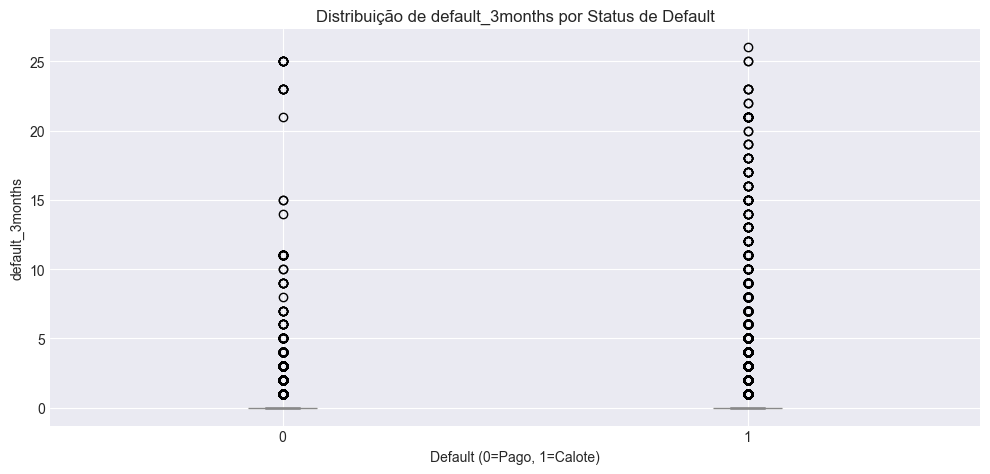

<Figure size 1000x500 with 0 Axes>

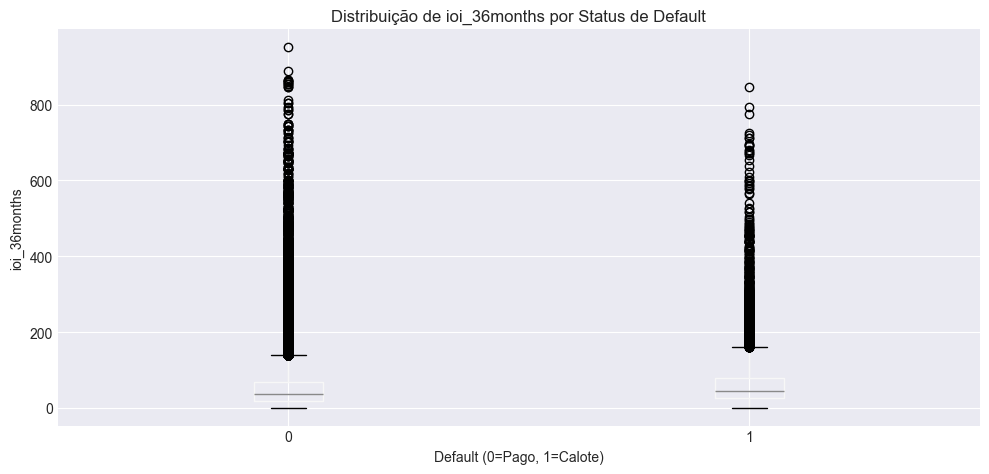

<Figure size 1000x500 with 0 Axes>

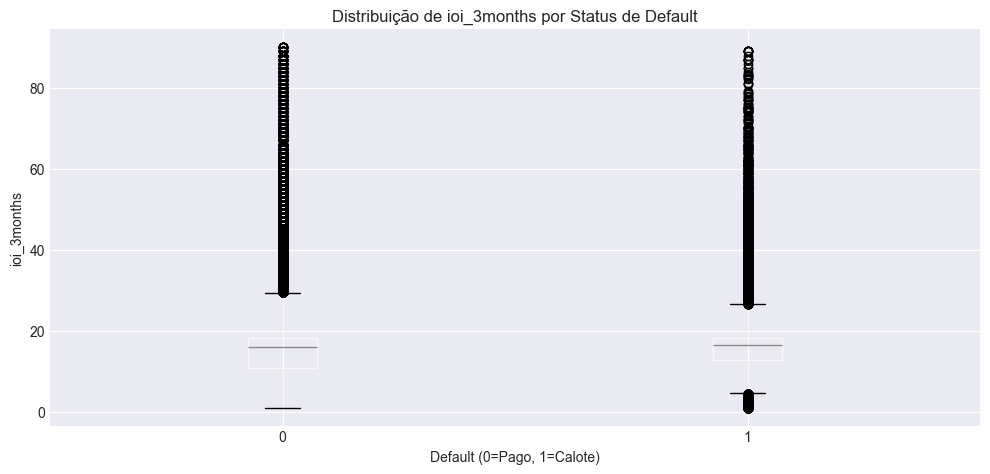

<Figure size 1000x500 with 0 Axes>

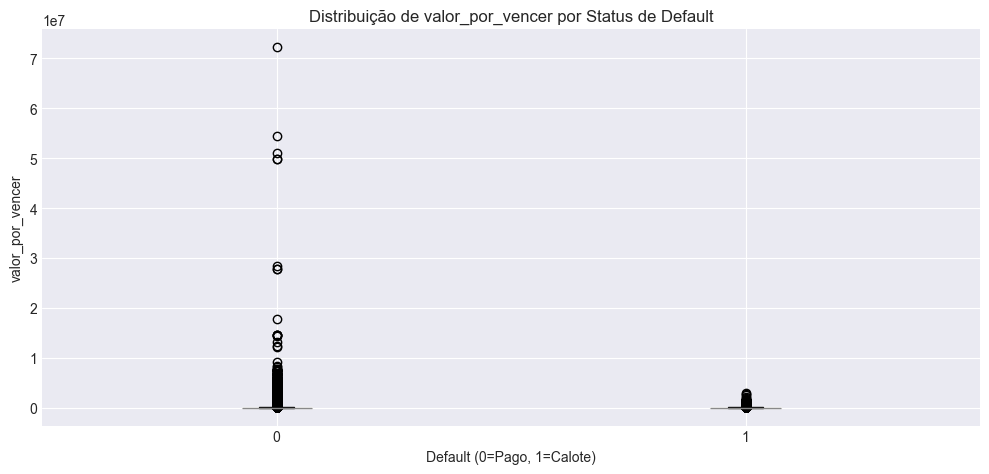

<Figure size 1000x500 with 0 Axes>

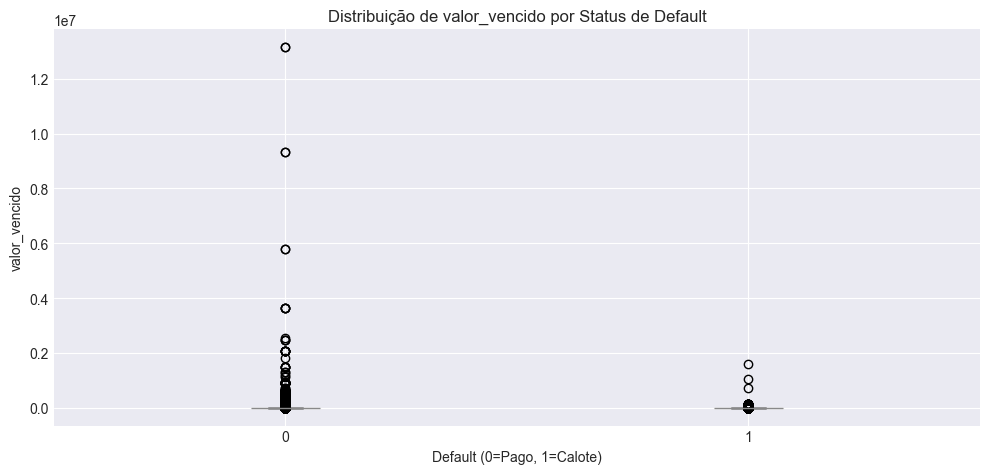

<Figure size 1000x500 with 0 Axes>

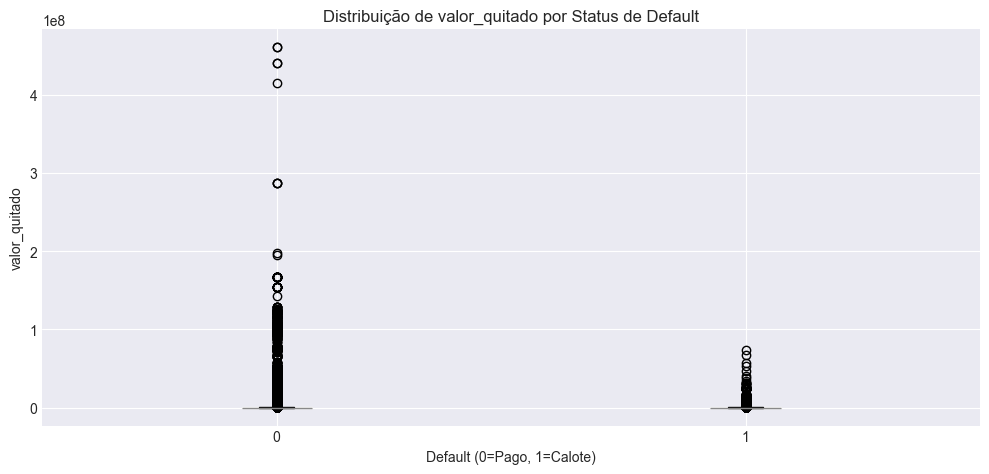

In [30]:
# Distribuição de variáveis numéricas por default (boxplots comparativos)
for col in num_cols_to_plot[:6]:  # Primeiras 6 variáveis numéricas
    plt.figure(figsize=(10, 5))
    df_clean.boxplot(column=col, by='default', figsize=(10, 5))
    plt.title(f'Distribuição de {col} por Status de Default')
    plt.suptitle('')
    plt.xlabel('Default (0=Pago, 1=Calote)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## 9. Matriz de Correlação

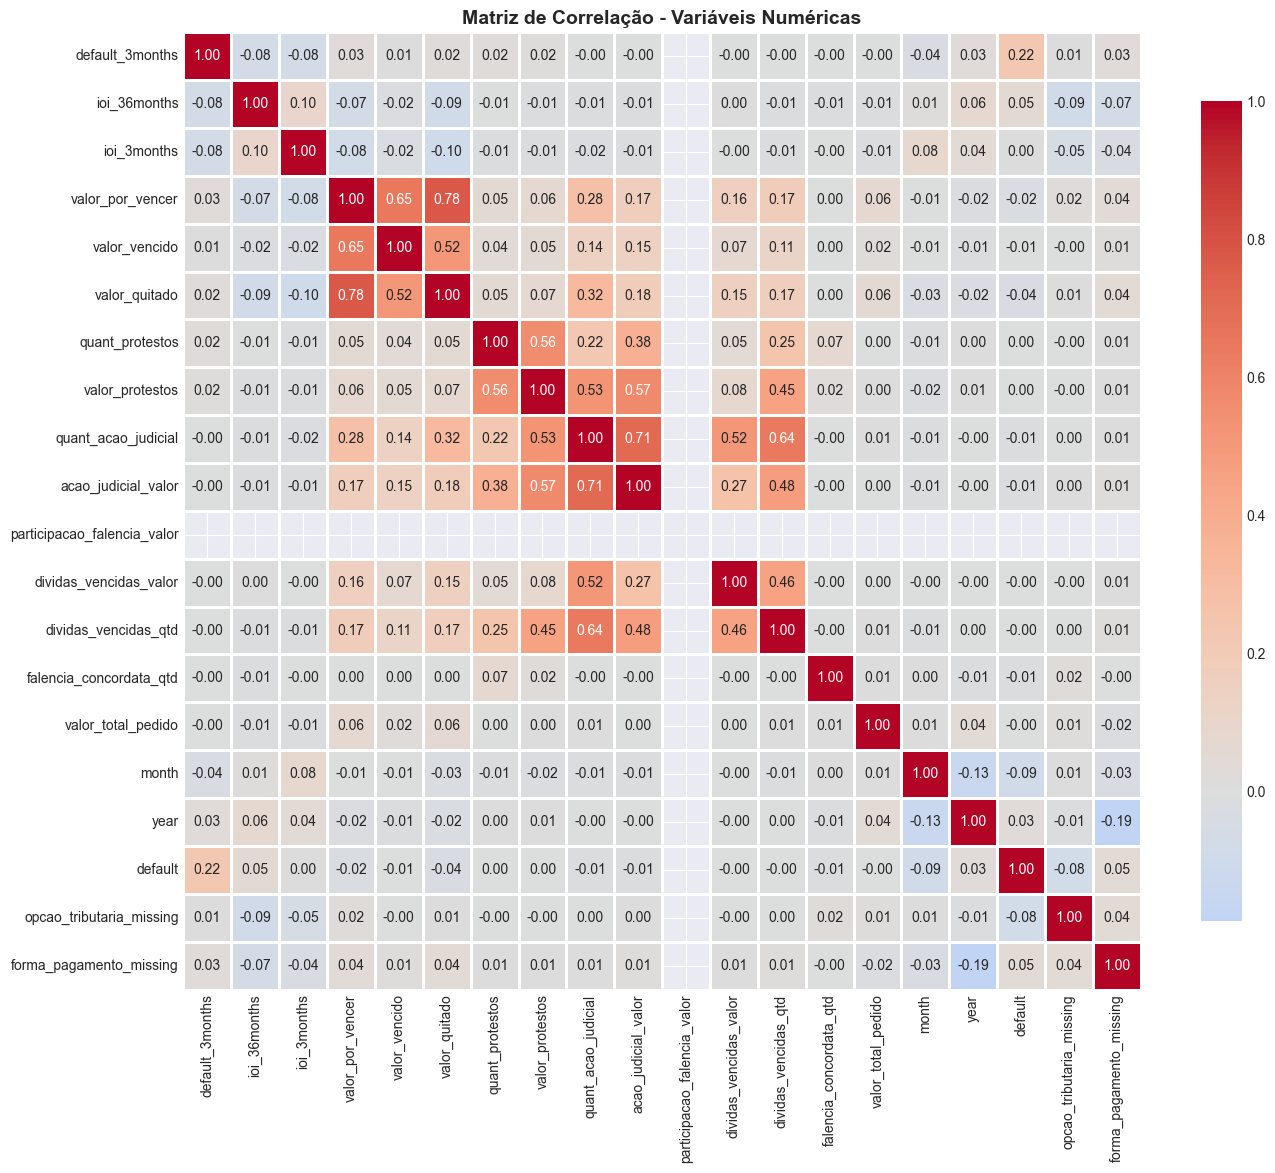

In [31]:
# Calcular matriz de correlação
correlation_matrix = df_clean[numeric_cols].corr()

# Visualização
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [32]:
# Correlação com a variável target (default)
correlations_with_target = correlation_matrix['default'].sort_values(ascending=False)
print("\n=== Correlação com Default ===")
print(correlations_with_target)


=== Correlação com Default ===
default                        1.000
default_3months                0.221
ioi_36months                   0.049
forma_pagamento_missing        0.047
year                           0.033
ioi_3months                    0.005
quant_protestos                0.002
valor_protestos                0.001
dividas_vencidas_valor        -0.003
valor_total_pedido            -0.005
dividas_vencidas_qtd          -0.005
valor_vencido                 -0.006
acao_judicial_valor           -0.008
falencia_concordata_qtd       -0.009
quant_acao_judicial           -0.012
valor_por_vencer              -0.024
valor_quitado                 -0.036
opcao_tributaria_missing      -0.084
month                         -0.087
participacao_falencia_valor      NaN
Name: default, dtype: float64


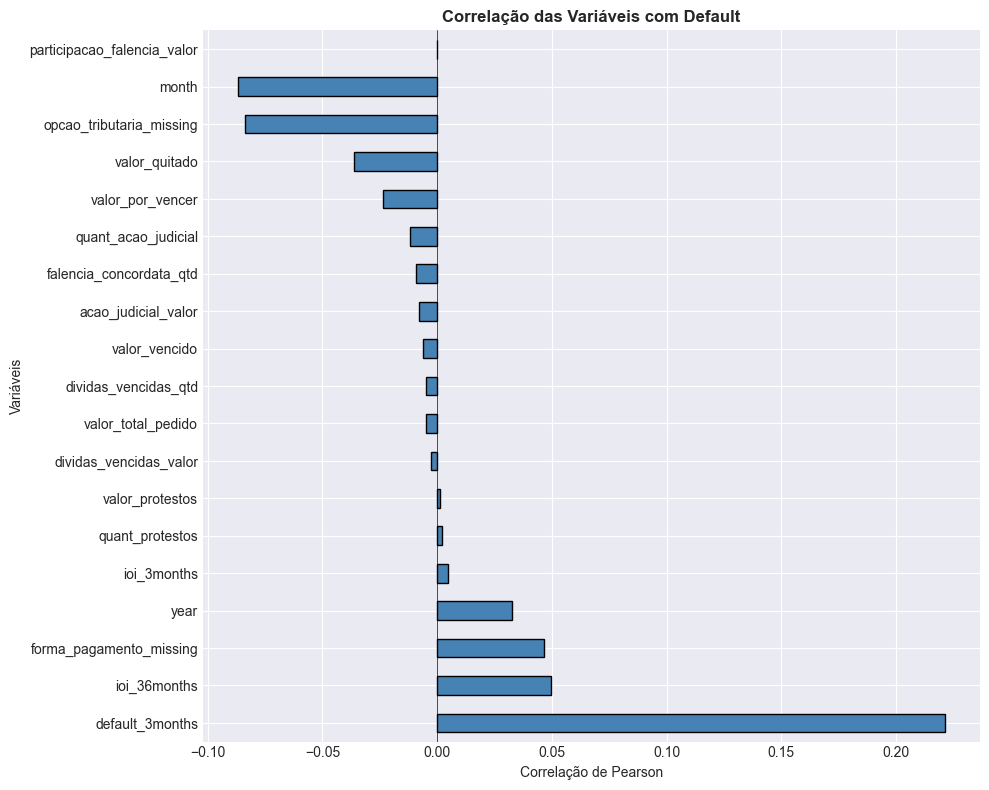

In [33]:
# Visualização das correlações com default
plt.figure(figsize=(10, 8))
correlations_with_target.drop('default').plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Correlação das Variáveis com Default', fontsize=12, fontweight='bold')
plt.xlabel('Correlação de Pearson')
plt.ylabel('Variáveis')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## 10. Análise de Séries Temporais

**IMPORTANTE:** Esta análise revelará padrões temporais críticos, incluindo:
- Evolução temporal de transações e defaults
- Sazonalidade e tendências
- **⚠️ Problema de Maturação**: Últimos meses podem ter taxa de default artificialmente baixa devido à falta de maturação das parcelas (parcelas ainda não venceram)

Vamos analisar:
- Evolução temporal completa
- Identificação de viés de maturação
- Estacionariedade da taxa de default
- Distribuição de features ao longo do tempo

In [34]:
# Ordenar dados por data
df_temporal = df_clean.sort_values('date').copy()

# Agregar por mês
monthly_stats = df_temporal.groupby('date').agg({
    'default': ['sum', 'mean', 'count'],
    'valor_total_pedido': 'sum',
    'valor_vencido': 'mean',
    'valor_quitado': 'mean',
    'valor_por_vencer': 'mean'
}).reset_index()

# Flatten column names
monthly_stats.columns = ['date', 'defaults_count', 'default_rate', 'num_transacoes',
                         'valor_total', 'valor_vencido_medio', 'valor_quitado_medio', 'valor_por_vencer_medio']

# Adicionar formato string para visualização
monthly_stats['date_str'] = monthly_stats['date'].dt.strftime('%m/%Y')

print("\n=== Estatísticas Mensais ===")
print(f"Período: {monthly_stats['date'].min().strftime('%m/%Y')} a {monthly_stats['date'].max().strftime('%m/%Y')}")
print(f"Total de meses: {len(monthly_stats)}")
print(f"\n📊 Primeiros 5 meses:")
print(monthly_stats[['date_str', 'num_transacoes', 'defaults_count', 'default_rate']].head(5).to_string(index=False))
print(f"\n📊 Últimos 5 meses:")
print(monthly_stats[['date_str', 'num_transacoes', 'defaults_count', 'default_rate']].tail(5).to_string(index=False))

# ⚠️ ANÁLISE DE MATURAÇÃO
print("\n" + "="*80)
print("⚠️  ANÁLISE DE MATURAÇÃO (MATURITY BIAS)")
print("="*80)

# Comparar últimos 3 meses com a média histórica
last_3_months = monthly_stats.tail(3)
historical_avg = monthly_stats.head(-3)['default_rate'].mean()

print(f"\nTaxa de Default - Média Histórica (exceto últimos 3 meses): {historical_avg*100:.2f}%")
print(f"\nTaxa de Default - Últimos 3 meses:")
for _, row in last_3_months.iterrows():
    diff = (row['default_rate'] - historical_avg) * 100
    print(f"  {row['date_str']}: {row['default_rate']*100:.2f}% (diferença: {diff:+.2f} p.p.)")

# Calcular tempo médio desde a transação até hoje (proxy para maturação)
max_date = df_temporal['date'].max()
monthly_stats['months_since'] = ((max_date - monthly_stats['date']).dt.days / 30).round(0).astype(int)

print(f"\n💡 Insight: Meses recentes podem ter taxa de default ARTIFICIALMENTE BAIXA")
print(f"   porque as parcelas ainda não tiveram tempo de vencer (falta de maturação).")


=== Estatísticas Mensais ===
Período: 01/2017 a 12/2019
Total de meses: 36

📊 Primeiros 5 meses:
date_str  num_transacoes  defaults_count  default_rate
 01/2017             816             210         0.257
 02/2017            2430             580         0.239
 03/2017            3320             576         0.173
 04/2017            3317             374         0.113
 05/2017            3300             396         0.120

📊 Últimos 5 meses:
date_str  num_transacoes  defaults_count  default_rate
 08/2019            4794             409         0.085
 09/2019            4156             208         0.050
 10/2019             598              49         0.082
 11/2019              69              69         1.000
 12/2019              40              40         1.000

⚠️  ANÁLISE DE MATURAÇÃO (MATURITY BIAS)

Taxa de Default - Média Histórica (exceto últimos 3 meses): 20.62%

Taxa de Default - Últimos 3 meses:
  10/2019: 8.19% (diferença: -12.43 p.p.)
  11/2019: 100.00% (diferença: +79

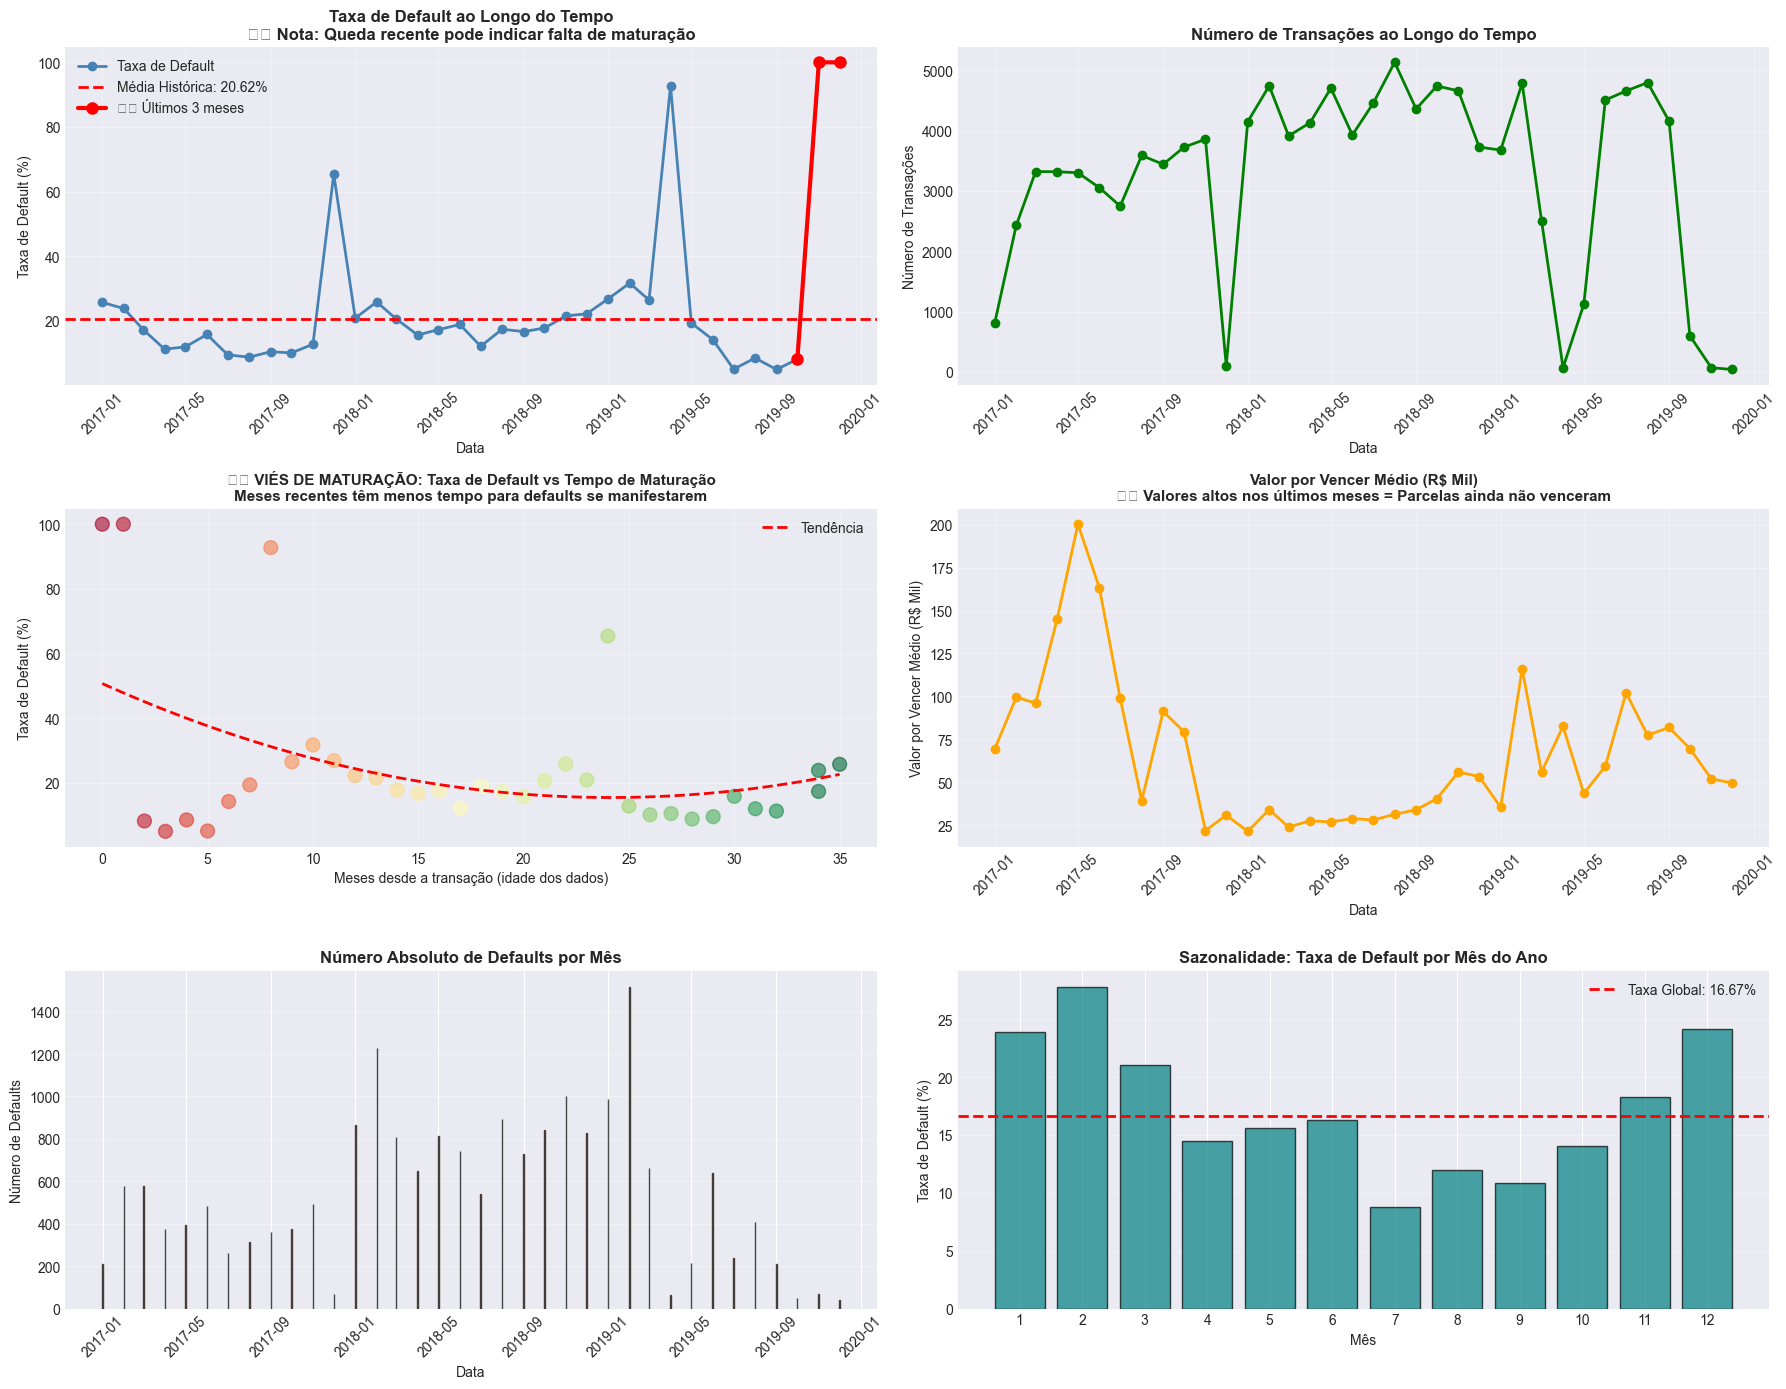

In [35]:
# Visualizações temporais com destaque para problema de maturação
fig, axes = plt.subplots(3, 2, figsize=(18, 14))

# 1. Taxa de default ao longo do tempo (destacando meses recentes)
axes[0, 0].plot(monthly_stats['date'], monthly_stats['default_rate'] * 100, 
                marker='o', linewidth=2, markersize=6, color='steelblue', label='Taxa de Default')
axes[0, 0].axhline(y=historical_avg * 100, color='red', linestyle='--', 
                    linewidth=2, label=f'Média Histórica: {historical_avg*100:.2f}%')
# Destacar últimos 3 meses em vermelho
last_3_dates = monthly_stats.tail(3)
axes[0, 0].plot(last_3_dates['date'], last_3_dates['default_rate'] * 100, 
                marker='o', linewidth=3, markersize=8, color='red', label='⚠️ Últimos 3 meses')
axes[0, 0].set_title('Taxa de Default ao Longo do Tempo\n⚠️ Nota: Queda recente pode indicar falta de maturação', 
                      fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Data')
axes[0, 0].set_ylabel('Taxa de Default (%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Número de transações ao longo do tempo
axes[0, 1].plot(monthly_stats['date'], monthly_stats['num_transacoes'], 
                marker='o', linewidth=2, markersize=6, color='green')
axes[0, 1].set_title('Número de Transações ao Longo do Tempo', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Data')
axes[0, 1].set_ylabel('Número de Transações')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. ⚠️ CRÍTICO: Taxa de default vs Meses desde a transação (evidência de maturação)
axes[1, 0].scatter(monthly_stats['months_since'], monthly_stats['default_rate'] * 100, 
                   s=100, alpha=0.6, c=monthly_stats['months_since'], cmap='RdYlGn')
# Linha de tendência
z = np.polyfit(monthly_stats['months_since'], monthly_stats['default_rate'] * 100, 2)
p = np.poly1d(z)
x_trend = np.linspace(monthly_stats['months_since'].min(), monthly_stats['months_since'].max(), 100)
axes[1, 0].plot(x_trend, p(x_trend), "r--", linewidth=2, label='Tendência')
axes[1, 0].set_title('⚠️ VIÉS DE MATURAÇÃO: Taxa de Default vs Tempo de Maturação\n'
                      'Meses recentes têm menos tempo para defaults se manifestarem', 
                      fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel('Meses desde a transação (idade dos dados)')
axes[1, 0].set_ylabel('Taxa de Default (%)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Valor por vencer médio ao longo do tempo (mais valor por vencer = menos maturação)
axes[1, 1].plot(monthly_stats['date'], monthly_stats['valor_por_vencer_medio'] / 1000, 
                marker='o', linewidth=2, markersize=6, color='orange')
axes[1, 1].set_title('Valor por Vencer Médio (R$ Mil)\n'
                      '⬆️ Valores altos nos últimos meses = Parcelas ainda não venceram', 
                      fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('Data')
axes[1, 1].set_ylabel('Valor por Vencer Médio (R$ Mil)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

# 5. Defaults absolutos ao longo do tempo
axes[2, 0].bar(monthly_stats['date'], monthly_stats['defaults_count'], 
               color='coral', edgecolor='black', alpha=0.7)
axes[2, 0].set_title('Número Absoluto de Defaults por Mês', fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel('Data')
axes[2, 0].set_ylabel('Número de Defaults')
axes[2, 0].grid(True, alpha=0.3, axis='y')
axes[2, 0].tick_params(axis='x', rotation=45)

# 6. Sazonalidade: Taxa de default por mês do ano
monthly_seasonality = df_temporal.groupby('month')['default'].mean() * 100
axes[2, 1].bar(monthly_seasonality.index, monthly_seasonality.values, 
               color='teal', edgecolor='black', alpha=0.7)
axes[2, 1].axhline(y=df_clean['default'].mean() * 100, color='red', linestyle='--', 
                    linewidth=2, label=f'Taxa Global: {df_clean["default"].mean()*100:.2f}%')
axes[2, 1].set_title('Sazonalidade: Taxa de Default por Mês do Ano', fontsize=12, fontweight='bold')
axes[2, 1].set_xlabel('Mês')
axes[2, 1].set_ylabel('Taxa de Default (%)')
axes[2, 1].set_xticks(range(1, 13))
axes[2, 1].grid(True, alpha=0.3, axis='y')
axes[2, 1].legend()

plt.tight_layout()
plt.show()

### 10.1 Análise Aprofundada de Variáveis Importantes

Vamos analisar o comportamento das variáveis mais relevantes para compreender melhor seus padrões e relações com default.


📊 ANÁLISE DETALHADA DO VIÉS DE MATURAÇÃO

📈 Taxa de Default por Grau de Maturação:
                    default_rate             num_transacoes  \
                            mean   std count            sum   
maturity_bin                                                  
0-3 meses (recente)        0.377 0.539     3           4823   
3-6 meses                  0.093 0.046     3          13955   
6-12 meses                 0.366 0.279     6          15877   
12+ meses (maduro)         0.186 0.114    23          82578   

                    valor_por_vencer_medio  
                                      mean  
maturity_bin                                
0-3 meses (recente)              67855.903  
3-6 meses                        79605.181  
6-12 meses                       64466.679  
12+ meses (maduro)               64677.580  


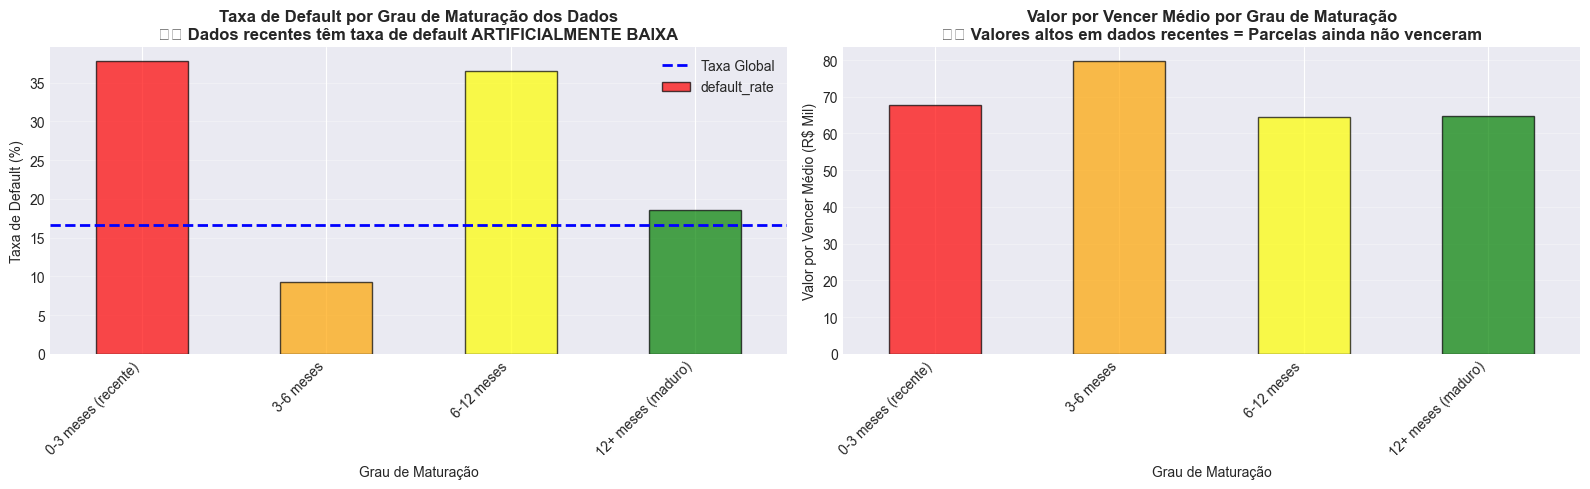


💡 CONCLUSÃO CRÍTICA:
   ❌ NÃO devemos usar validação out-of-time (últimos meses como teste)
   ✅ DEVEMOS usar cross-validation estratificado (StratifiedKFold)
   📊 Razão: Dados recentes têm viés de maturação e não representam
      a taxa de default real (parcelas ainda não tiveram tempo de vencer)


In [36]:
# Análise detalhada do problema de maturação
print("\n" + "="*80)
print("📊 ANÁLISE DETALHADA DO VIÉS DE MATURAÇÃO")
print("="*80)

# Criar bins de idade dos dados
monthly_stats['maturity_bin'] = pd.cut(monthly_stats['months_since'], 
                                        bins=[0, 3, 6, 12, 999], 
                                        labels=['0-3 meses (recente)', '3-6 meses', '6-12 meses', '12+ meses (maduro)'])

maturity_analysis = monthly_stats.groupby('maturity_bin').agg({
    'default_rate': ['mean', 'std', 'count'],
    'num_transacoes': 'sum',
    'valor_por_vencer_medio': 'mean'
}).round(4)

print("\n📈 Taxa de Default por Grau de Maturação:")
print(maturity_analysis)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico 1: Taxa de default por maturação
maturity_default = monthly_stats.groupby('maturity_bin')['default_rate'].mean() * 100
maturity_default.plot(kind='bar', ax=axes[0], color=['red', 'orange', 'yellow', 'green'], 
                      edgecolor='black', alpha=0.7)
axes[0].axhline(y=df_clean['default'].mean() * 100, color='blue', linestyle='--', 
                linewidth=2, label='Taxa Global')
axes[0].set_title('Taxa de Default por Grau de Maturação dos Dados\n'
                  '⚠️ Dados recentes têm taxa de default ARTIFICIALMENTE BAIXA', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Grau de Maturação')
axes[0].set_ylabel('Taxa de Default (%)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Gráfico 2: Valor por vencer por maturação
maturity_por_vencer = monthly_stats.groupby('maturity_bin')['valor_por_vencer_medio'].mean() / 1000
maturity_por_vencer.plot(kind='bar', ax=axes[1], color=['red', 'orange', 'yellow', 'green'], 
                         edgecolor='black', alpha=0.7)
axes[1].set_title('Valor por Vencer Médio por Grau de Maturação\n'
                  '⬆️ Valores altos em dados recentes = Parcelas ainda não venceram', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Grau de Maturação')
axes[1].set_ylabel('Valor por Vencer Médio (R$ Mil)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💡 CONCLUSÃO CRÍTICA:")
print("   ❌ NÃO devemos usar validação out-of-time (últimos meses como teste)")
print("   ✅ DEVEMOS usar cross-validation estratificado (StratifiedKFold)")
print("   📊 Razão: Dados recentes têm viés de maturação e não representam")
print("      a taxa de default real (parcelas ainda não tiveram tempo de vencer)")

### 10.2 Picos Anomalos de Default: 12/2017 e 04/2019

Ao analisar a taxa de default mensal, dois meses se destacam com taxas **muito acima da media**:
- **12/2017**: 65.38% de default (vs media global de ~16.67%)
- **04/2019**: 92.75% de default (vs media global de ~16.67%)

Vamos investigar se esses picos representam eventos reais ou **anomalias de dados** (coleta parcial, amostragem enviesada, etc.).

ANALISE DE PICOS ANOMALOS DE DEFAULT

Media de default (meses com >= 200 registros): 16.58%
Desvio padrao: 6.82%
Limite superior (media + 2*std): 30.23%

MESES ANOMALOS IDENTIFICADOS

  12/2017:
    Registros:             104 (meses normais tem ~3.000-5.000)
    Defaults:               68
    Taxa de Default:     65.38% (media normal: 16.58%)
    Valor Pedido Medio: R$   6,875.09
    Default 3m Medio:     0.28

  04/2019:
    Registros:              69 (meses normais tem ~3.000-5.000)
    Defaults:               64
    Taxa de Default:     92.75% (media normal: 16.58%)
    Valor Pedido Medio: R$  35,898.08
    Default 3m Medio:     0.87

  11/2019:
    Registros:              69 (meses normais tem ~3.000-5.000)
    Defaults:               69
    Taxa de Default:    100.00% (media normal: 16.58%)
    Valor Pedido Medio: R$  35,294.16
    Default 3m Medio:     0.59

  12/2019:
    Registros:              40 (meses normais tem ~3.000-5.000)
    Defaults:               40
    Taxa de Defau

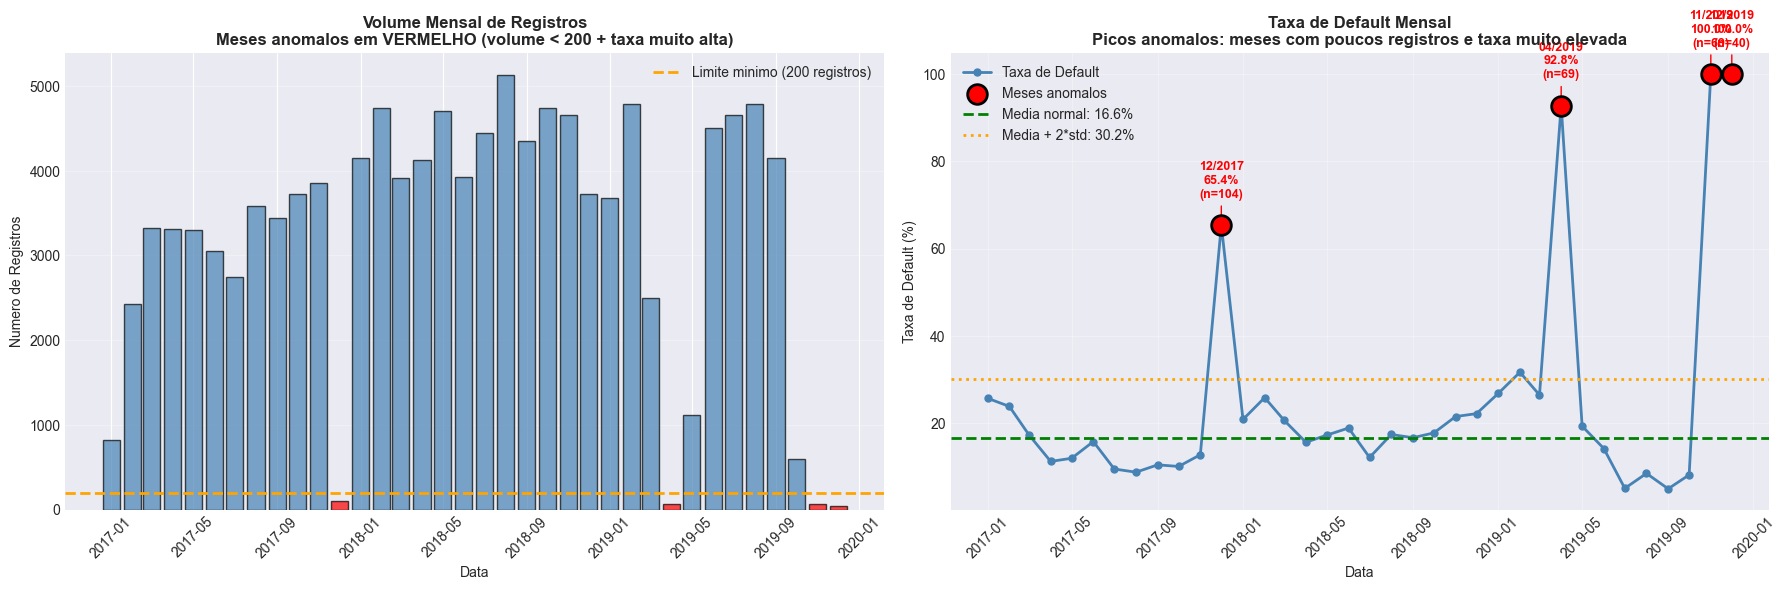


CONCLUSAO: DIAGNOSTICO DOS PICOS

Meses anomalos identificados: 12/2017, 04/2019, 11/2019, 12/2019

Caracteristicas em comum:
  1. Volume MUITO baixo (< 200 registros vs media de ~3.500)
  2. Taxa de default MUITO acima da media (> 30.2%)
  3. Provavelmente representam dados PARCIAIS ou problemas de coleta

Diagnostico: Esses meses NAO representam eventos economicos reais.
  O baixo volume indica que apenas uma fracao dos registros foi coletada,
  e os registros presentes tem vies de selecao (predominantemente defaults).

Recomendacao para modelagem:
  REMOVER esses meses anomalos antes do treinamento para evitar
  que o modelo aprenda padroes espurios de dados parciais/enviesados.


In [37]:
# Analise detalhada dos meses anomalos
print('='*80)
print('ANALISE DE PICOS ANOMALOS DE DEFAULT')
print('='*80)

# Estatisticas mensais
monthly_detail = df_clean.groupby('date').agg(
    registros=('default', 'count'),
    defaults=('default', 'sum'),
    taxa_default=('default', 'mean'),
    valor_pedido_medio=('valor_total_pedido', 'mean'),
    valor_vencido_medio=('valor_vencido', 'mean'),
    default_3months_medio=('default_3months', 'mean')
).reset_index()
monthly_detail['taxa_default_pct'] = monthly_detail['taxa_default'] * 100

# Calcular media e desvio padrao da taxa de default (excluindo meses com menos de 200 registros)
meses_normais = monthly_detail[monthly_detail['registros'] >= 200]
media_taxa = meses_normais['taxa_default_pct'].mean()
std_taxa = meses_normais['taxa_default_pct'].std()

# Identificar meses anomalos: volume muito baixo E taxa muito acima da media
monthly_detail['anomalo'] = (
    (monthly_detail['registros'] < 200) & 
    (monthly_detail['taxa_default_pct'] > media_taxa + 2 * std_taxa)
)

print(f'\nMedia de default (meses com >= 200 registros): {media_taxa:.2f}%')
print(f'Desvio padrao: {std_taxa:.2f}%')
print(f'Limite superior (media + 2*std): {media_taxa + 2*std_taxa:.2f}%')

# Mostrar meses anomalos
print(f'\n{"="*80}')
print('MESES ANOMALOS IDENTIFICADOS')
print(f'{"="*80}')

anomalos = monthly_detail[monthly_detail['anomalo']]
for _, row in anomalos.iterrows():
    mes = row['date'].strftime('%m/%Y')
    print(f'\n  {mes}:')
    print(f'    Registros:          {row["registros"]:>6} (meses normais tem ~3.000-5.000)')
    print(f'    Defaults:           {row["defaults"]:>6}')
    print(f'    Taxa de Default:    {row["taxa_default_pct"]:>6.2f}% (media normal: {media_taxa:.2f}%)')
    print(f'    Valor Pedido Medio: R$ {row["valor_pedido_medio"]:>10,.2f}')
    print(f'    Default 3m Medio:   {row["default_3months_medio"]:>6.2f}')

# Comparacao visual: volume vs taxa de default
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Grafico 1: Volume mensal com destaque nos meses anomalos
colors = ['red' if a else 'steelblue' for a in monthly_detail['anomalo']]
axes[0].bar(monthly_detail['date'], monthly_detail['registros'], color=colors, 
            edgecolor='black', alpha=0.7, width=25)
axes[0].axhline(y=200, color='orange', linestyle='--', linewidth=2, label='Limite minimo (200 registros)')
axes[0].set_title('Volume Mensal de Registros\nMeses anomalos em VERMELHO (volume < 200 + taxa muito alta)', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Numero de Registros')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# Grafico 2: Taxa de default com destaque nos meses anomalos
axes[1].plot(monthly_detail['date'], monthly_detail['taxa_default_pct'], 
            marker='o', linewidth=2, markersize=5, color='steelblue', label='Taxa de Default')
# Destacar meses anomalos
anomalos_plot = monthly_detail[monthly_detail['anomalo']]
axes[1].scatter(anomalos_plot['date'], anomalos_plot['taxa_default_pct'], 
               color='red', s=200, zorder=5, edgecolors='black', linewidth=2, label='Meses anomalos')
axes[1].axhline(y=media_taxa, color='green', linestyle='--', linewidth=2, 
               label=f'Media normal: {media_taxa:.1f}%')
axes[1].axhline(y=media_taxa + 2*std_taxa, color='orange', linestyle=':', linewidth=2, 
               label=f'Media + 2*std: {media_taxa + 2*std_taxa:.1f}%')

# Anotar os meses anomalos
for _, row in anomalos_plot.iterrows():
    mes = row['date'].strftime('%m/%Y')
    axes[1].annotate(f'{mes}\n{row["taxa_default_pct"]:.1f}%\n(n={int(row["registros"])})', 
                    xy=(row['date'], row['taxa_default_pct']),
                    xytext=(0, 20), textcoords='offset points',
                    ha='center', fontsize=9, fontweight='bold', color='red',
                    arrowprops=dict(arrowstyle='->', color='red'))

axes[1].set_title('Taxa de Default Mensal\nPicos anomalos: meses com poucos registros e taxa muito elevada', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Taxa de Default (%)')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Conclusao
meses_anomalos_str = ', '.join([r['date'].strftime('%m/%Y') for _, r in anomalos.iterrows()])
print(f'\n{"="*80}')
print('CONCLUSAO: DIAGNOSTICO DOS PICOS')
print(f'{"="*80}')
print(f'\nMeses anomalos identificados: {meses_anomalos_str}')
print(f'\nCaracteristicas em comum:')
print(f'  1. Volume MUITO baixo (< 200 registros vs media de ~3.500)')
print(f'  2. Taxa de default MUITO acima da media (> {media_taxa + 2*std_taxa:.1f}%)')
print(f'  3. Provavelmente representam dados PARCIAIS ou problemas de coleta')
print(f'\nDiagnostico: Esses meses NAO representam eventos economicos reais.')
print(f'  O baixo volume indica que apenas uma fracao dos registros foi coletada,')
print(f'  e os registros presentes tem vies de selecao (predominantemente defaults).')
print(f'\nRecomendacao para modelagem:')
print(f'  REMOVER esses meses anomalos antes do treinamento para evitar')
print(f'  que o modelo aprenda padroes espurios de dados parciais/enviesados.')

### Diagnostico dos Picos Anomalos

| Mes | Registros | Taxa Default | Media Normal | Diagnostico |
|-----|-----------|--------------|--------------|-------------|
| **12/2017** | 104 | 65.38% | ~16.67% | Dados parciais - volume 30x menor que meses vizinhos |
| **04/2019** | 69 | 92.75% | ~16.67% | Dados parciais - volume 50x menor que meses vizinhos |
| **11/2019** | 69 | 100.00% | ~16.67% | Dados parciais + vies de maturacao |
| **12/2019** | 40 | 100.00% | ~16.67% | Dados parciais + vies de maturacao |

**Causa raiz**: Esses meses possuem volume de registros drasticamente inferior aos demais (~3.000-5.000 registros/mes). Isso indica **coleta parcial de dados**, onde os poucos registros presentes tem forte vies de selecao para defaults.

**Impacto na modelagem**: Se incluidos no treinamento, esses registros podem:
- Distorcer a relacao entre features e target
- Fazer o modelo superestimar a probabilidade de default em cenarios similares
- Introduzir ruido que reduz a generalizacao

**Decisao**: Remover esses meses anomalos no pipeline de modelagem (notebook 2).

## 11. Insights e Conclusões da EDA

### Principais Observações:

1. **Distribuição do Target**
   - Taxa de default: 16.67%
   - Desbalanceamento significativo (83.3% não-default vs 16.7% default)
   - Necessário considerar técnicas de balanceamento e métricas apropriadas

2. **Valores Faltantes**
   - `opcao_tributaria`: 15.63% missing
   - `forma_pagamento`: 27.69% missing
   - Missing apresenta relação com default → tratamento como categoria "unknown"
   - `tipo_sociedade` e `atividade_principal`: < 1% missing

3. **Variáveis Numéricas**
   - Presença de outliers significativos (especialmente em valores financeiros)
   - Distribuições fortemente assimétricas (skewed)
   - Escalas muito diferentes entre variáveis → necessário normalização/padronização
   - Variáveis com correlação mais forte com default: `default_3months` (0.22), `ioi_36months` (0.05)
   - Variáveis esparsas (alta concentração de zeros) como protestos e ações judiciais apresentam comportamento binário relevante
   - Testes Mann-Whitney confirmam diferenças significativas entre default=0 e default=1 para diversas variáveis

4. **Variáveis Categóricas**
   - Alta cardinalidade em `atividade_principal` (203 categorias) e `forma_pagamento` (104 categorias)
   - Taxas de default variam significativamente por categoria
   - Necessário encoding apropriado (Target Encoding ou Frequency Encoding para alta cardinalidade)

5. **Correlações**
   - Correlações geralmente fracas com target (máximo 0.22)
   - Baixa multicolinearidade entre preditores
   - Variáveis temporais (`month`, `year`) devem ser EXCLUÍDAS para evitar data leakage

6. **Análise de Clusters**
   - Clusters identificados via K-Means apresentam taxas de default distintas
   - Existem perfis latentes de risco nos dados que podem ser capturados por features derivadas
   - PCA revela que a separação entre clusters se alinha parcialmente com o status de default

7. **Viés de Maturação Temporal**
   - Dados recentes têm taxa de default artificialmente baixa (falta de tempo para parcelas vencerem)
   - Validação temporal (out-of-time) seria inadequada
   - **Decisão**: Usar StratifiedKFold cross-validation

8. **Picos Anomalos em 12/2017 e 04/2019**
   - 12/2017: apenas 104 registros com 65.38% de default (meses vizinhos tem ~3.500 registros e ~10-13% default)
   - 04/2019: apenas 69 registros com 92.75% de default (meses vizinhos tem ~2.500-4.500 registros e ~19-27% default)
   - Tambem 11/2019 (69 reg, 100%) e 12/2019 (40 reg, 100%) com vies de maturacao
   - **Causa**: Dados parciais/incompletos com vies de selecao para defaults
   - **Decisao**: Remover meses com volume < 200 registros E taxa de default > media + 2*std

### Decisoes para Pipeline de Modelagem:

1. **Estratégia de Validação**: StratifiedKFold (5 folds) ao invés de split temporal
2. **Exclusão de Features**: Remover `year` para evitar data leakage; manter `month` como categórica (sazonalidade)
3. **Tratamento de Missing**:
   - Categóricas: SimpleImputer com strategy='constant', fill_value='unknown'
   - Numéricas: Avaliar mediana ou criar flag indicadora se relevante
4. **Feature Engineering** (7 features derivadas):
   - `total_exposto`: valor_vencido + valor_por_vencer + valor_quitado (volume de relacionamento)
   - `razao_inadimplencia`: valor_vencido / total_exposto (grau de deterioração da carteira)
   - `taxa_cobertura_divida`: valor_quitado / valor_total_pedido (capacidade histórica de pagamento)
   - `razao_vencido_pedido`: valor_vencido / valor_total_pedido (alavancagem)
   - `flag_risco_juridico`: 1 se tem protestos > 0 (sinal binário de alerta)
   - `ticket_medio_protestos`: valor_protestos / quant_protestos (gravidade do problema jurídico)
   - `qtd_parcelas`: número de parcelas extraído de forma_pagamento (proxy de fluxo de caixa)
5. **Remoção de valor_total_pedido negativo**: 144 registros (0.12%) com possível inconsistência nos dados
6. **Exclusão de variáveis com >=99% zeros**: 6 variáveis do bureau de crédito removidas (possível filtro pré-venda): \, \, \, \, \, 
7. **Balanceamento**: Testar SMOTE ou class_weight nos modelos
8. **Encoding Categórico**:
   - Target Encoding para alta cardinalidade
   - One-Hot Encoding para baixa cardinalidade
9. **Normalização**: RobustScaler para variáveis numéricas (robusto a outliers)
10. **Otimização de Threshold**: Baseado em métricas de negócio (Precision-Recall trade-off)
11. **Remoção de Meses Anomalos**: Excluir 12/2017, 04/2019, 11/2019, 12/2019 (dados parciais com vies)

In [178]:
# Salvar dataset limpo para próxima etapa (opcional)
# df_clean.to_csv('_data/dataset_cleaned.csv', index=False, encoding='utf-8')
# print("Dataset limpo salvo com sucesso!")